In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
data = pd.read_csv("data/data.csv")
df = data.copy()
artist_data = pd.read_csv("data/data_by_artist.csv")
genre_data = pd.read_csv('data/data_by_genres.csv')
year_data = pd.read_csv('data/data_by_year.csv')

# EDA
## song df

In [4]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

valence  year  acousticness  \
0   0.0594  1921         0.982   
1   0.9630  1921         0.732   
2   0.0394  1921         0.961   
3   0.1650  1921         0.967   
4   0.2530  1921         0.957   

                                             artists  danceability  \
0  ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                     ['Dennis Day']         0.819   
2  ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...         0.328   
3                                   ['Frank Parker']         0.275   
4                                     ['Phil Regan']         0.418   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       831667   0.211         0  4BJqT0PrAfrxzMOxytFOIz          0.878000   
1       180533   0.341         0  7xPhfUan2yNtyFG0cUWkt8          0.000000   
2       500062   0.166         0  1o6I8BglA6ylDMrIELygv1          0.913000   
3       210000   0.309         0  3ftBPsC5vPBKxYSee08FDH          0.000028   
4       166693   0.193         0  4d6HGyGT8e121BsdKmw9v6          0.000002   

   key  liveness  loudness  mode  \
0   10     0.665   -20.096     1   
1    7     0.160   -12.441     1   
2    3     0.101   -14.850     1   
3    5     0.381    -9.316     1   
4    3     0.229   -10.096     1   

                                                name  popularity release_date  \
0  Piano Concerto No. 3 in D Minor, Op. 30: III. ...           4         1921   
1                            Clancy Lowered the Boom           5         1921   
2                                          Gati Bali           5         1921   
3                                          Danny Boy           3         1921   
4                        When Irish Eyes Are Smiling           2         1921   

   speechiness    tempo  
0       0.0366   80.954  
1       0.4150   60.936  
2       0.0339  110.339  
3       0.0354  100.109  
4       0.0380  101.665

In [5]:
data['release_date'] = data['release_date'].astype(str)

# Define a function to handle date conversion
def convert_date(date_str):
    if len(date_str) == 4:  # Only year is present
        return pd.to_datetime(date_str + '-01-01')  # Defaulting to January 1st of the given year
    else:
        return pd.to_datetime(date_str)

# Apply the conversion function to the release_date column
data['release_date'] = data['release_date'].apply(convert_date)
data['release_date'] = pd.to_datetime(data['release_date'])
data.head()

valence  year  acousticness  \
0   0.0594  1921         0.982   
1   0.9630  1921         0.732   
2   0.0394  1921         0.961   
3   0.1650  1921         0.967   
4   0.2530  1921         0.957   

                                             artists  danceability  \
0  ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                     ['Dennis Day']         0.819   
2  ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...         0.328   
3                                   ['Frank Parker']         0.275   
4                                     ['Phil Regan']         0.418   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       831667   0.211         0  4BJqT0PrAfrxzMOxytFOIz          0.878000   
1       180533   0.341         0  7xPhfUan2yNtyFG0cUWkt8          0.000000   
2       500062   0.166         0  1o6I8BglA6ylDMrIELygv1          0.913000   
3       210000   0.309         0  3ftBPsC5vPBKxYSee08FDH          0.000028   
4       166693   0.193         0  4d6HGyGT8e121BsdKmw9v6          0.000002   

   key  liveness  loudness  mode  \
0   10     0.665   -20.096     1   
1    7     0.160   -12.441     1   
2    3     0.101   -14.850     1   
3    5     0.381    -9.316     1   
4    3     0.229   -10.096     1   

                                                name  popularity release_date  \
0  Piano Concerto No. 3 in D Minor, Op. 30: III. ...           4   1921-01-01   
1                            Clancy Lowered the Boom           5   1921-01-01   
2                                          Gati Bali           5   1921-01-01   
3                                          Danny Boy           3   1921-01-01   
4                        When Irish Eyes Are Smiling           2   1921-01-01   

   speechiness    tempo  
0       0.0366   80.954  
1       0.4150   60.936  
2       0.0339  110.339  
3       0.0354  100.109  
4       0.0380  101.665

In [6]:
data.describe().T

count                           mean  \
valence           170653.0                       0.528587   
year              170653.0                    1976.787241   
acousticness      170653.0                       0.502115   
danceability      170653.0                       0.537396   
duration_ms       170653.0                  230948.310666   
energy            170653.0                       0.482389   
explicit          170653.0                       0.084575   
instrumentalness  170653.0                        0.16701   
key               170653.0                       5.199844   
liveness          170653.0                       0.205839   
loudness          170653.0                      -11.46799   
mode              170653.0                       0.706902   
popularity        170653.0                      31.431794   
release_date        170653  1977-01-25 06:06:37.311503424   
speechiness       170653.0                       0.098393   
tempo             170653.0                      116.86159   

                                  min                  25%  \
valence                           0.0                0.317   
year                           1921.0               1956.0   
acousticness                      0.0                0.102   
danceability                      0.0                0.415   
duration_ms                    5108.0             169827.0   
energy                            0.0                0.255   
explicit                          0.0                  0.0   
instrumentalness                  0.0                  0.0   
key                               0.0                  2.0   
liveness                          0.0               0.0988   
loudness                        -60.0              -14.615   
mode                              0.0                  0.0   
popularity                        0.0                 11.0   
release_date      1921-01-01 00:00:00  1956-01-01 00:00:00   
speechiness                       0.0               0.0349   
tempo                             0.0               93.421   

                                  50%                  75%  \
valence                          0.54                0.747   
year                           1977.0               1999.0   
acousticness                    0.516                0.893   
danceability                    0.548                0.668   
duration_ms                  207467.0             262400.0   
energy                          0.471                0.703   
explicit                          0.0                  0.0   
instrumentalness             0.000216                0.102   
key                               5.0                  8.0   
liveness                        0.136                0.261   
loudness                       -10.58               -7.183   
mode                              1.0                  1.0   
popularity                       33.0                 48.0   
release_date      1977-11-04 00:00:00  1999-02-03 00:00:00   
speechiness                     0.045               0.0756   
tempo                         114.729              135.537   

                                  max            std  
valence                           1.0       0.263171  
year                           2020.0      25.917853  
acousticness                    0.996       0.376032  
danceability                    0.988       0.176138  
duration_ms                 5403500.0  126118.414668  
energy                            1.0       0.267646  
explicit                          1.0       0.278249  
instrumentalness                  1.0       0.313475  
key                              11.0       3.515094  
liveness                          1.0       0.174805  
loudness                        3.855       5.697943  
mode                              1.0       0.455184  
popularity                      100.0      21.826615  
release_date      2020-11-24 00:00:00            NaN  
speechiness                      0.97        0.1

In [7]:
data.isnull().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

In [26]:
def determine_column_counts(df):
    columns = df.columns
    columns = columns.drop('id')
    data_counts = pd.DataFrame(columns = ['column_name','column_type','num_rows','distinct_data', 'distinct_percent', 'missing_data', 'missing_percentage'])
    
    #For each column, calculate number and percentage of missing rows and distinct counts
    for col in columns :
        col_vals = df[col]
        total_data = len(col_vals)
        col_missing = sum(col_vals.isnull())
        missing_percent = round((col_missing / len(df[col])) * 100 , 3)
        col_distinct = (col_vals.nunique())
        distinct_percent = round((col_distinct / len(df[col])) * 100 , 3)

        data_counts.loc[len(data_counts)] = [col, col_vals.dtype, total_data, col_distinct, distinct_percent, col_missing, missing_percent]
        
    return(data_counts)

missing_data = determine_column_counts(data)
missing_data

column_name     column_type  num_rows  distinct_data  \
0            valence         float64    170653           1733   
1               year           int64    170653            100   
2       acousticness         float64    170653           4689   
3            artists          object    170653          34088   
4       danceability         float64    170653           1240   
5        duration_ms           int64    170653          51755   
6             energy         float64    170653           2332   
7           explicit           int64    170653              2   
8   instrumentalness         float64    170653           5401   
9                key           int64    170653             12   
10          liveness         float64    170653           1740   
11          loudness         float64    170653          25410   
12              mode           int64    170653              2   
13              name          object    170653         133638   
14        popularity           int64    170653            100   
15      release_date  datetime64[ns]    170653          10968   
16       speechiness         float64    170653           1626   
17             tempo         float64    170653          84694   
18            decade          object    170653             11   

    distinct_percent  missing_data  missing_percentage  
0              1.016             0                 0.0  
1              0.059             0                 0.0  
2              2.748             0                 0.0  
3             19.975             0                 0.0  
4              0.727             0                 0.0  
5             30.328             0                 0.0  
6              1.367             0                 0.0  
7              0.001             0                 0.0  
8              3.165             0                 0.0  
9              0.007             0                 0.0  
10             1.020             0                 0.0  
11            14.890             0                 0.0  
12             0.001             0                 0.0  
13            78.310             0                 0.0  
14             0.059             0                 0.0  
15             6.427             0                 0.0  
16             0.953             0                 0.0  
17            49.629             0                 0.0  
18             0.006             0                 0.0

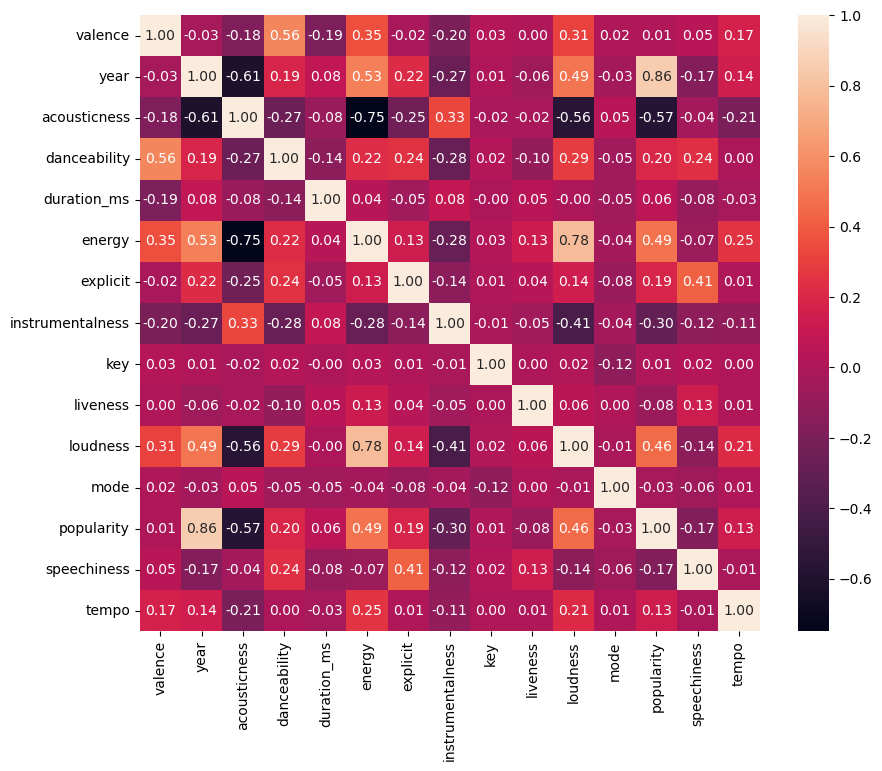

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.select_dtypes(include=['float64', 'int64']).corr(), annot=True, fmt=".2f")
plt.show()

In [17]:
#pip install yellowbrick

  Obtaining dependency information for yellowbrick from https://files.pythonhosted.org/packages/06/35/c7d44bb541c06bc41b3239b27af79ea0ecc7dbb156ee1335576f99c58b91/yellowbrick-1.5-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 4.4 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


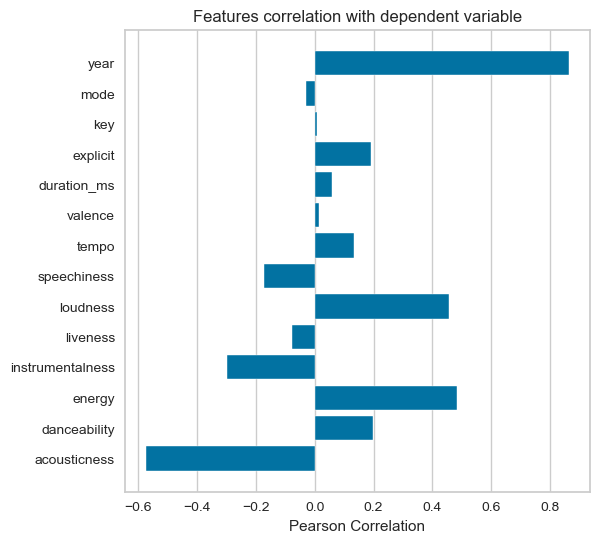

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [23]:
from yellowbrick.target import FeatureCorrelation

feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','explicit','key','mode','year']

X, y = data[feature_names], data['popularity']

# Create a list of the feature names
features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(6,6)
visualizer.fit(X, y)     # Fit the data to the visualizer
visualizer.show()

Text(0.5, 1.0, 'Distribution of Music')

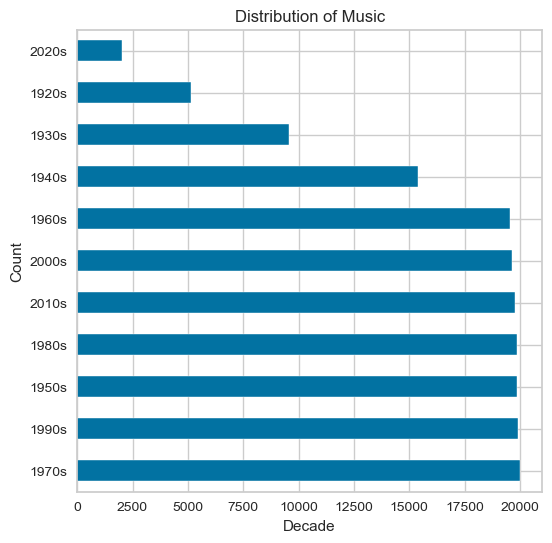

In [25]:
data['decade'] = data['year'].apply(lambda year : f'{(year//10)*10}s')
decades = data.decade.value_counts()
decades.plot(kind='barh')
plt.xlabel('Decade')
plt.ylabel('Count')
plt.title('Distribution of Music')

In [28]:
#pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/ac/66/937d1d73389c0b501c928c4d8513653063d2b40272dff70d0e283d8b9144/wordcloud-1.9.3-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 2.9 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


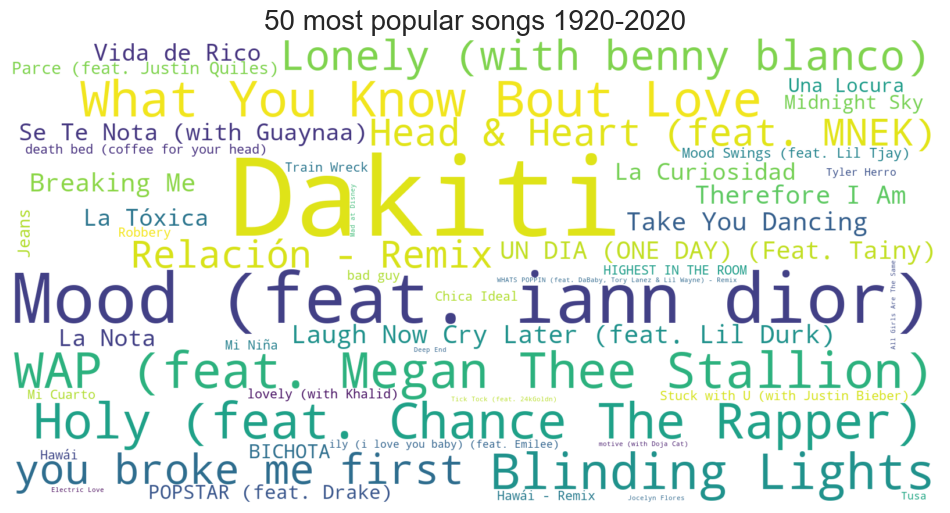

In [29]:
from wordcloud import WordCloud
song_popularity = data[['name', 'popularity']].set_index('name').to_dict()['popularity']
song_popularity = sorted(song_popularity.items(), key=lambda x: x[1], reverse=True)

wordcloud = WordCloud(width=1600, height=800, max_words=50, background_color='white').generate_from_frequencies(dict(song_popularity))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('50 most popular songs 1920-2020', fontsize=20)
plt.show()

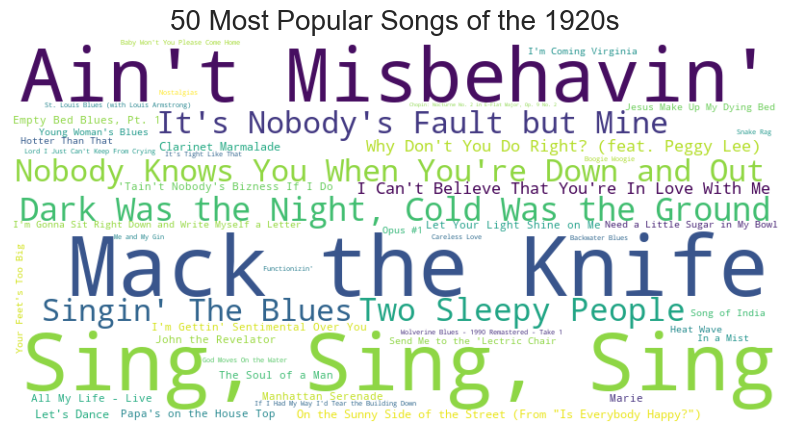

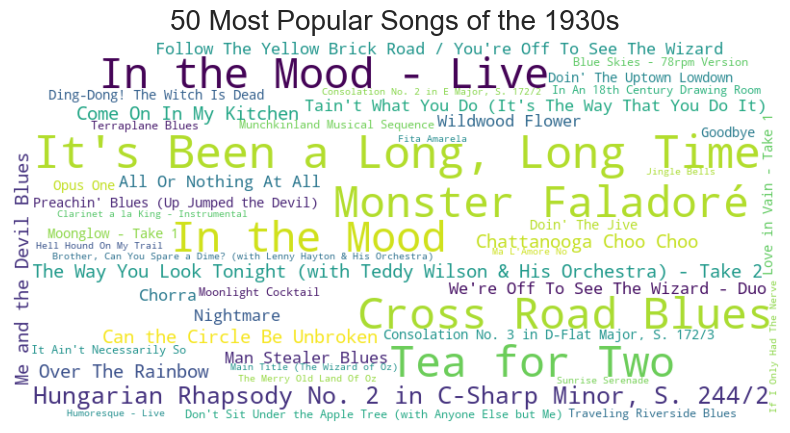

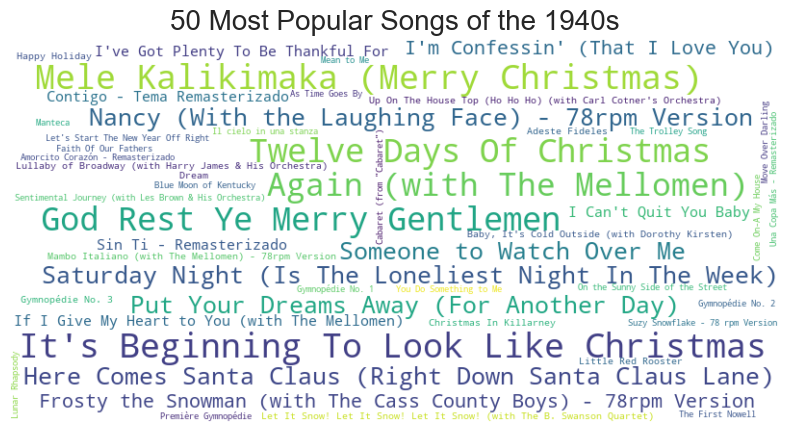

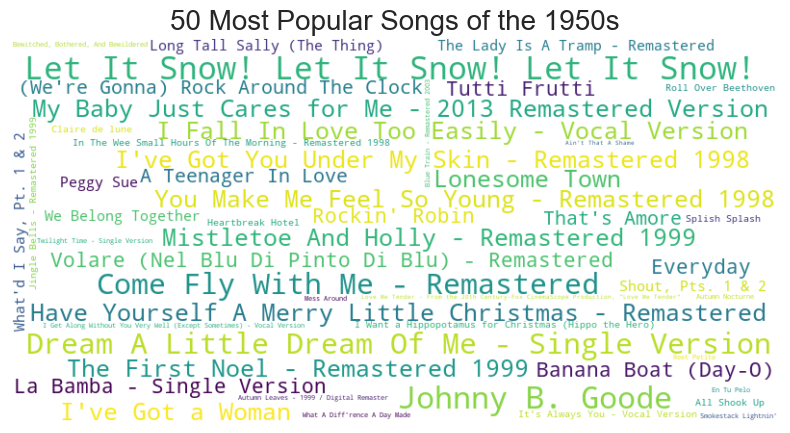

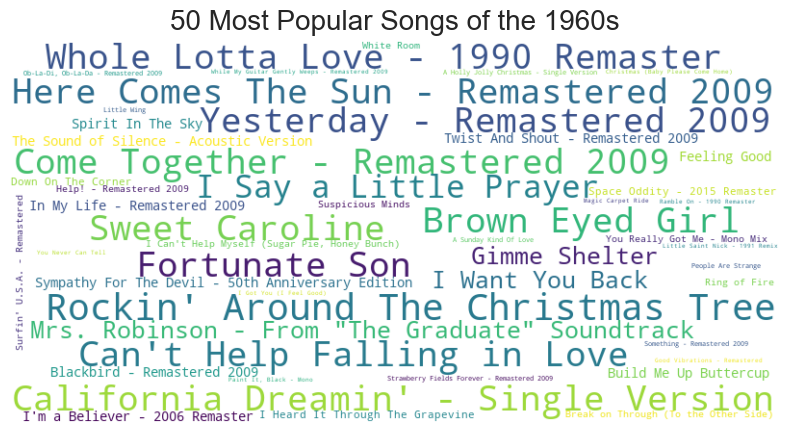

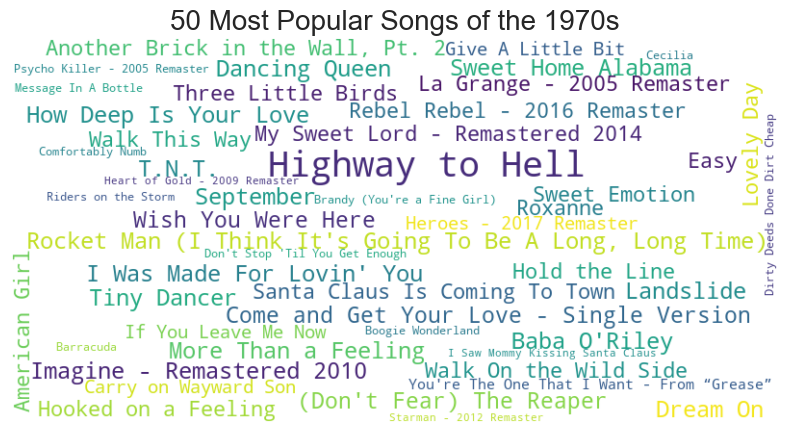

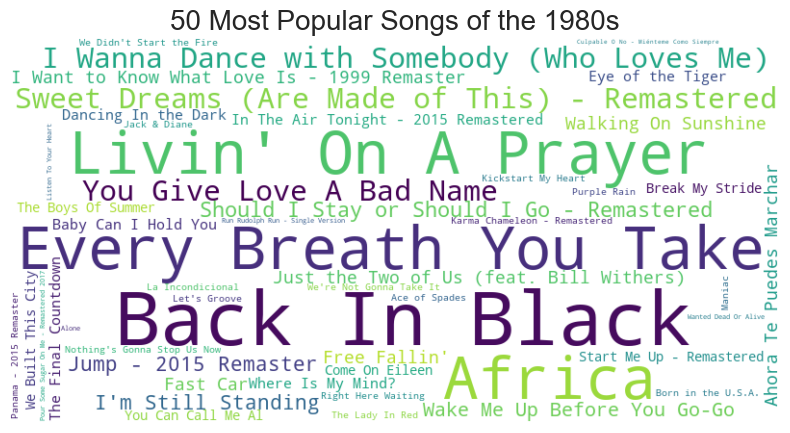

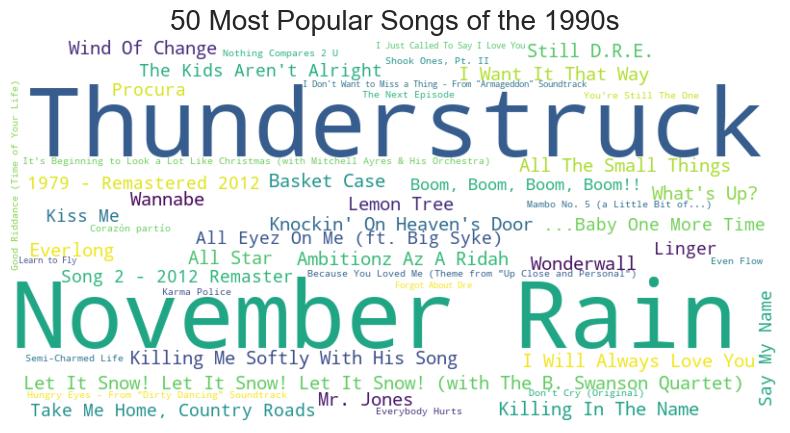

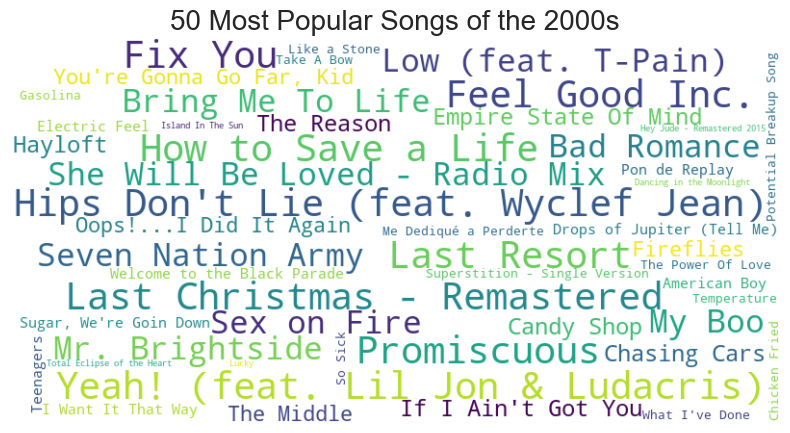

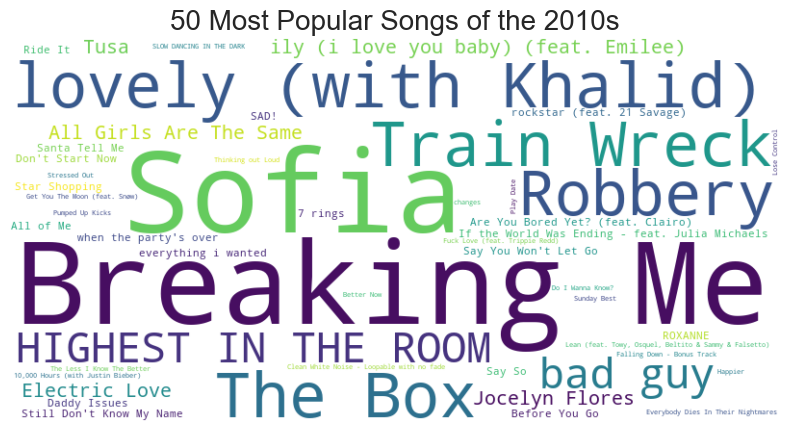

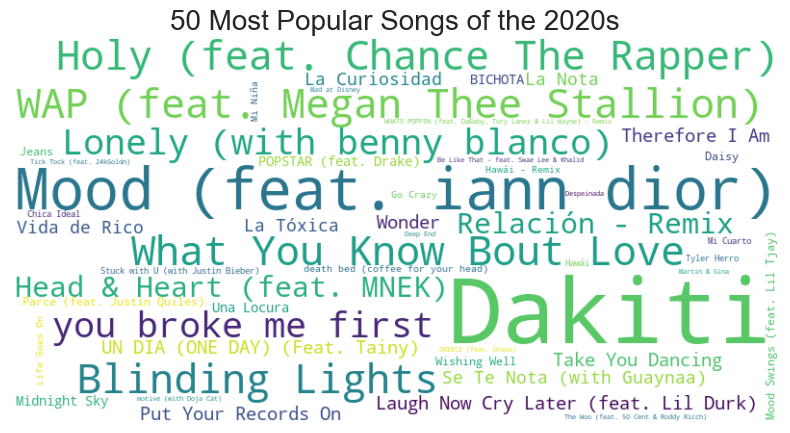

In [34]:
from wordcloud import WordCloud

for decade in sorted(data['decade'].unique()):
    # Filter songs by decade
    decade_data = data[data['decade'] == decade]
    
    # Create a dictionary of song names and popularity
    song_popularity = decade_data[['name', 'popularity']].set_index('name').to_dict()['popularity']
    
    # Sort songs by popularity within the decade
    sorted_songs = sorted(song_popularity.items(), key=lambda x: x[1], reverse=True)
    
    # Generate word cloud from frequencies
    wordcloud = WordCloud(width=800, height=400, max_words=50, background_color='white').generate_from_frequencies(dict(sorted_songs))
    
    # Plot
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'50 Most Popular Songs of the {decade}', fontsize=20)
    plt.show()

There is no missing data present within the dataset, with 170653 rows. 

There are a few columns with only a couple distinct values - explicity and mode both only have two distinct values. 

Name, tempo, duration_ms have the highest percent of distinct data

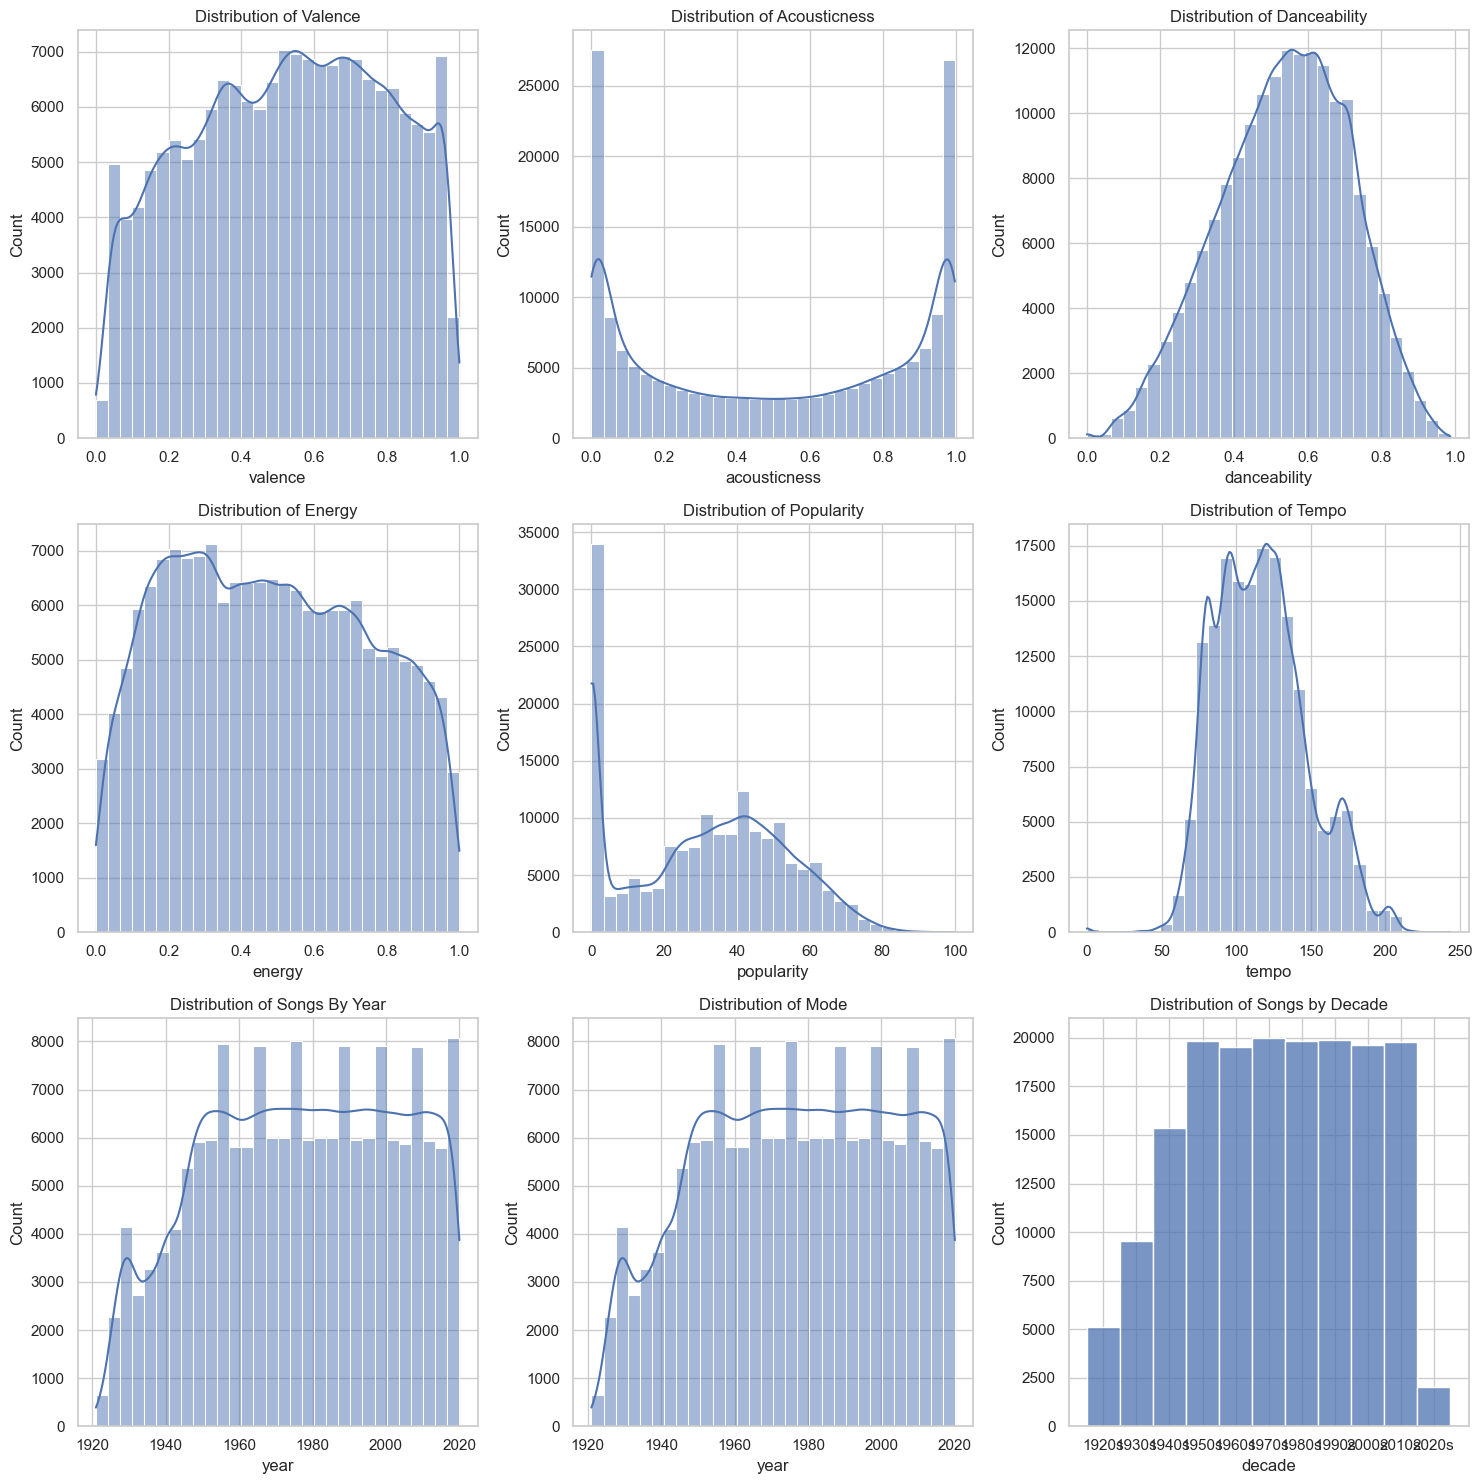

In [10]:
# Setting up the aesthetics for the plots
sns.set(style="whitegrid")

# Plotting distributions of some key features
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Valence distribution
sns.histplot(data['valence'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Valence')

# Acousticness distribution
sns.histplot(data['acousticness'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Acousticness')

# Danceability distribution
sns.histplot(data['danceability'], bins=30, kde=True, ax=axes[0,2])
axes[0,2].set_title('Distribution of Danceability')

# Energy distribution
sns.histplot(data['energy'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Energy')

# Popularity distribution
sns.histplot(data['popularity'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Popularity')

# Tempo distribution
sns.histplot(data['tempo'], bins=30, kde=True, ax=axes[1, 2])
axes[1, 2].set_title('Distribution of Tempo')


# Year distribution
sns.histplot(data['year'], bins=30, kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Distribution of Songs By Year')

# Mode distribution
sns.histplot(data['year'], bins=30, kde=True, ax=axes[2, 1])
axes[2, 1].set_title('Distribution of Mode')

data['decade'] = data['year'].apply(lambda year : f'{(year//10)*10}s' )
sns.histplot(data['decade'], bins=30,  ax=axes[2, 2])
axes[2, 2].set_title('Distribution of Songs by Decade')

plt.tight_layout()
plt.show()


Distribution of Valence: Peaks in the mid-range, suggesting that most songs have moderate levels of musical positiveness.

Distribution of Acousticness: Shows a U-shaped distribution, indicating that songs are typically either highly acoustic or not at all.

Distribution of Danceability: Follows a bell-shaped curve centered around 0.5 to 0.7, implying most songs are moderately danceable.

Distribution of Energy: Also centers around a moderate level, suggesting that most songs have a balanced energy level.

Distribution of Popularity: Heavily skewed towards lower values, indicating that most songs have low popularity scores.

Distribution of Tempo: Shows a bell-shaped distribution with a peak around 120 BPM, suggesting that this is the most common tempo for songs.

Distribution of Songs by Year: Increases over time, particularly after 1960, indicating a growing number of songs being produced or recorded in databases.

Distribution of Mode: Shows a preference for one mode over the other, indicating a commonality in the modal structure of songs, with a majority likely being in a major key given the two distinct peaks.

Distribution of Songs by Decade: There's a noticeable increase in song counts beginning in the 1950s, with each subsequent decade having more songs than the last, peaking in the 2000s. The count for the 2010s appears slightly lower than the 2000s, but it's still significantly higher than in earlier decades. This could be due to various factors including the increase in music production, distribution channels, and changes in recording technologies.

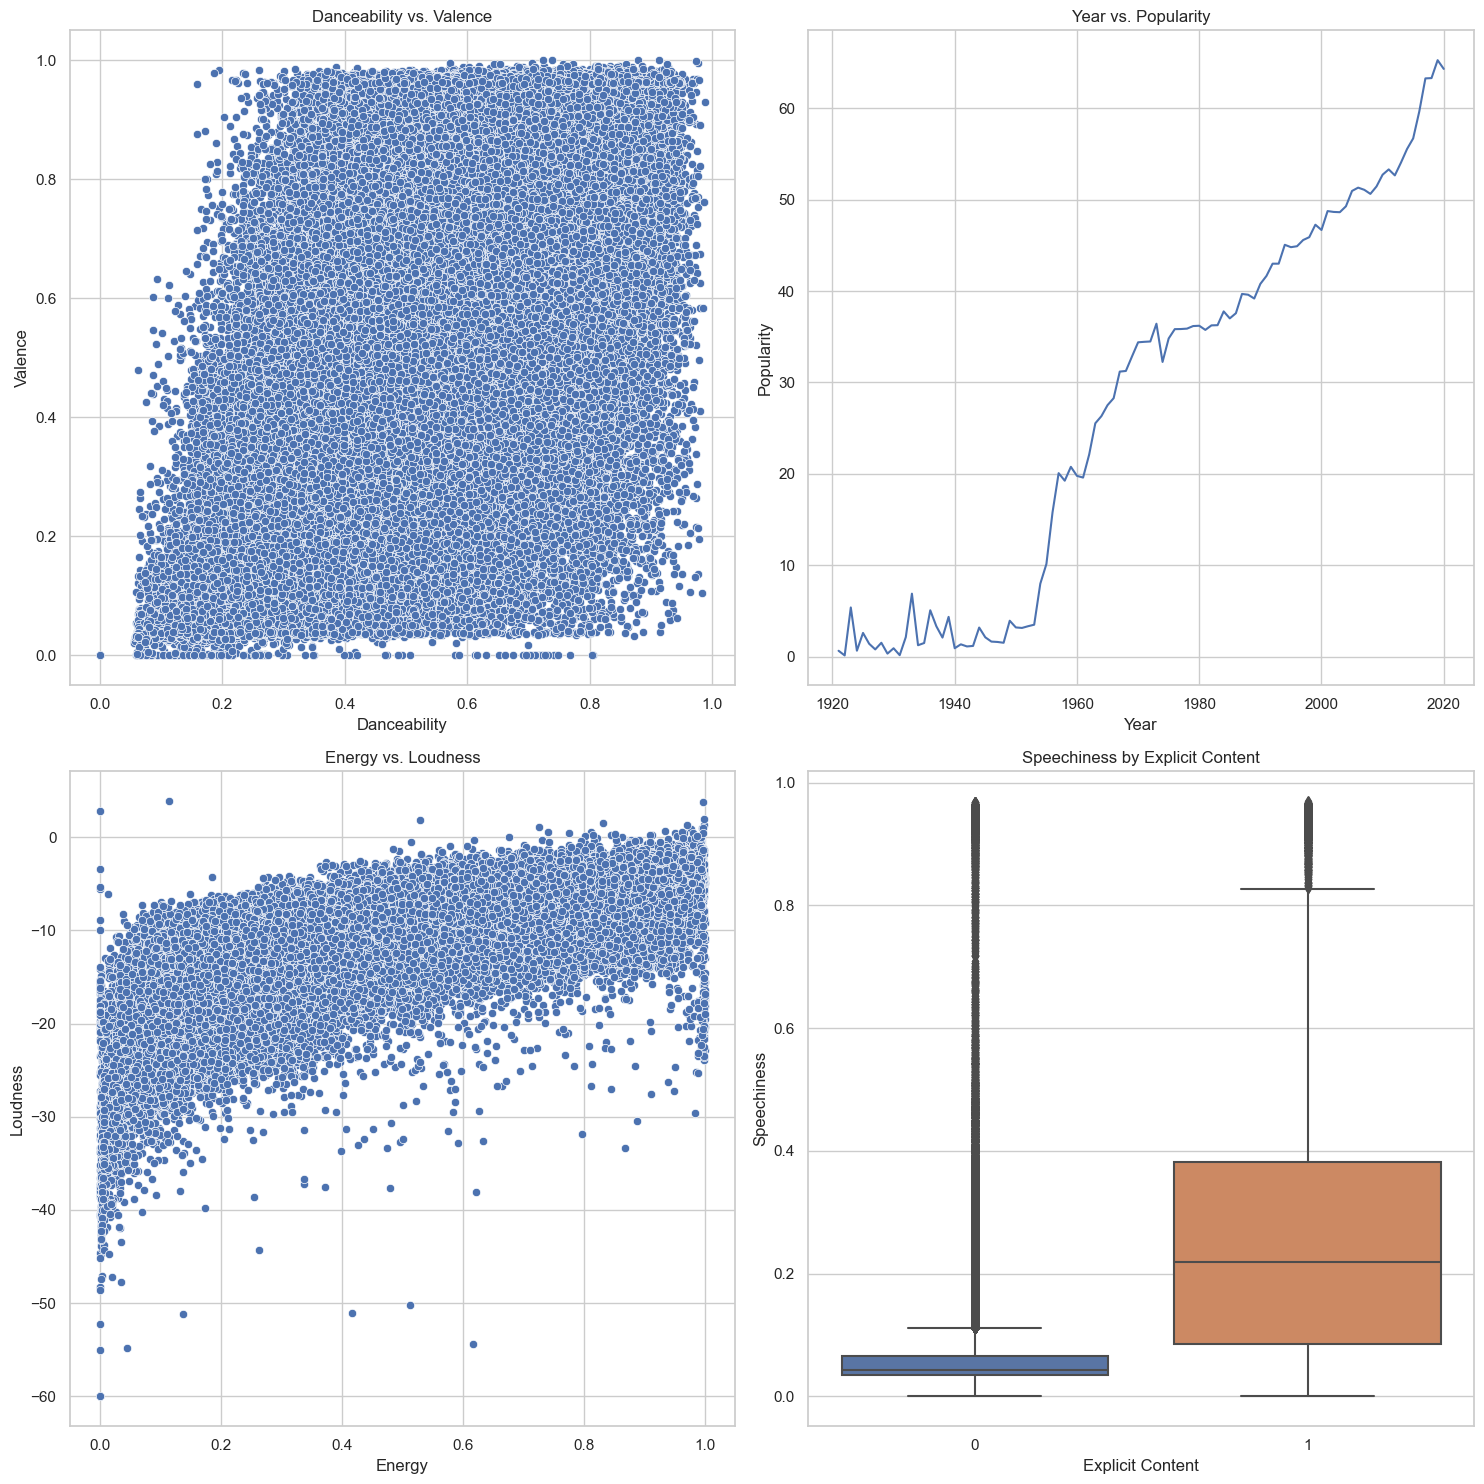

In [11]:
# Set up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(15, 15))  # 3 Rows, 2 Columns

# Danceability vs. Valence
sns.scatterplot(ax=axes[0, 0], data=data, x='danceability', y='valence')
axes[0, 0].set_title('Danceability vs. Valence')
axes[0, 0].set_xlabel('Danceability')
axes[0, 0].set_ylabel('Valence')

# Year vs. Popularity
sns.lineplot(ax=axes[0, 1], data=data, x='year', y='popularity', ci=None)
axes[0, 1].set_title('Year vs. Popularity')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Popularity')

# Energy vs. Loudness
sns.scatterplot(ax=axes[1, 0], data=data, x='energy', y='loudness')
axes[1, 0].set_title('Energy vs. Loudness')
axes[1, 0].set_xlabel('Energy')
axes[1, 0].set_ylabel('Loudness')


# Speechiness vs. Explicit
sns.boxplot(ax=axes[1, 1], data=data, x='explicit', y='speechiness')
axes[1, 1].set_title('Speechiness by Explicit Content')
axes[1, 1].set_xlabel('Explicit Content')
axes[1, 1].set_ylabel('Speechiness')



# Adjust layout
plt.tight_layout()
plt.show()


Danceability vs. Valence: Shows no clear correlation between how danceable a song is and its positivity level. The data is spread evenly across all values.

Year vs. Popularity: Indicates a significant increase in song popularity from the 1960s to the present, with a particularly sharp rise in recent years.

Energy vs. Loudness: Demonstrates a positive relationship, with more energetic songs generally being louder.

Speechiness by Explicit Content: Reveals that explicit songs tend to have a higher range and median of speechiness compared to non-explicit songs.





In [37]:
# Group the data by 'year' and calculate the mean only for numeric columns
year_data = data.select_dtypes(include=['float64', 'int64']).groupby('year').mean().reset_index()

# Now 'year' should be one of the columns, so we can use it in the plot
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
fig = px.line(year_data, x='year', y=sound_features, title='Trend of various sound features over decades')

# Show the plot
fig.show()

In [38]:
fig = px.line(year_data, x='year', y='loudness',title='Trend of loudness over decades')
fig.show()

The chart indicates significant changes in the acousticness and instrumentalness of music over time, while other features like danceability, energy, liveness, and valence have shown more stability or minor fluctuations.




## Artists df


In [13]:
artist_data.head()

mode  count  acousticness  \
0     1      9      0.590111   
1     1     26      0.862538   
2     1      7      0.856571   
3     1     27      0.884926   
4     1      7      0.510714   

                                             artists  danceability  \
0                   "Cats" 1981 Original London Cast      0.467222   
1                          "Cats" 1983 Broadway Cast      0.441731   
2        "Fiddler On The Roof” Motion Picture Chorus      0.348286   
3     "Fiddler On The Roof” Motion Picture Orchestra      0.425074   
4  "Joseph And The Amazing Technicolor Dreamcoat"...      0.467143   

     duration_ms    energy  instrumentalness  liveness   loudness  \
0  250318.555556  0.394003          0.011400  0.290833 -14.448000   
1  287280.000000  0.406808          0.081158  0.315215 -10.690000   
2  328920.000000  0.286571          0.024593  0.325786 -15.230714   
3  262890.962963  0.245770          0.073587  0.275481 -15.639370   
4  270436.142857  0.488286          0.009400  0.195000 -10.236714   

   speechiness       tempo   valence  popularity  key  
0     0.210389  117.518111  0.389500   38.333333    5  
1     0.176212  103.044154  0.268865   30.576923    5  
2     0.118514   77.375857  0.354857   34.857143    0  
3     0.123200   88.667630  0.372030   34.851852    0  
4     0.098543  122.835857  0.482286   43.000000    5

In [14]:
top10_popular_artists = artist_data.nlargest(10, 'popularity')
top10_most_song_produced_artists = artist_data.nlargest(10, 'count')
print('Top 10 Artists that produced most songs:')
top10_most_song_produced_artists[['count','artists']].sort_values('count',ascending=False)

Top 10 Artists that produced most songs:


count            artists
8367    3169   Francisco Canaro
28561   2422   Эрнест Хемингуэй
28560   2136  Эрих Мария Ремарк
8434    1459      Frank Sinatra
10714   1256    Ignacio Corsini
27109   1200  Vladimir Horowitz
1682    1146   Arturo Toscanini
2707    1103     Billie Holiday
12378   1061        Johnny Cash
7426    1023      Elvis Presley

In [15]:
print('Top 10 Artists that had most popularity score:')
top10_popular_artists[['popularity','artists']].sort_values('popularity',ascending=False)

Top 10 Artists that had most popularity score:


popularity          artists
20966        93.0      Ritt Momney
14354        92.0        Lele Pons
15070        90.0  Los Legendarios
11764        89.0         Jerry Di
7463         88.0           Emilee
23687        88.0        Surf Mesa
28263        88.0      salem ilese
213          87.0              A7S
2343         86.0          Beltito
14378        86.0     Lenny Santos

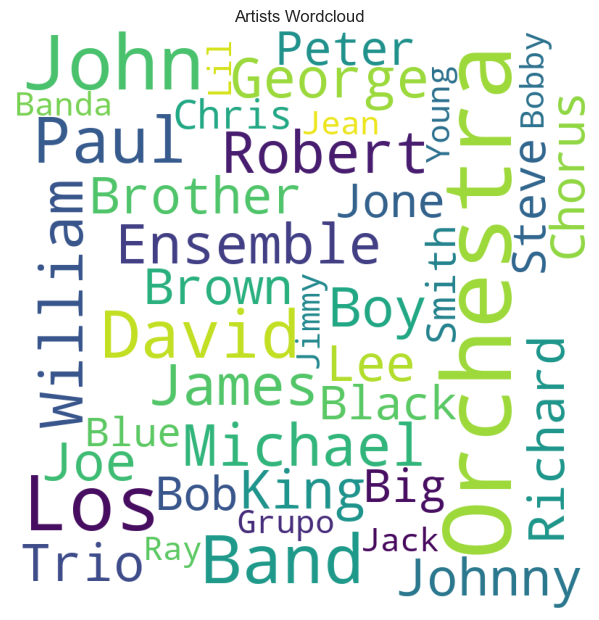

In [43]:
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
comment_words = " ".join(artist_data['artists'])+" "
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_word_length=3,
                max_words=40,
                min_font_size = 10).generate(comment_words)
                      
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Artists Wordcloud")
plt.tight_layout(pad = 0)
plt.show()

## Genre df

In [24]:
top10_genres = genre_data.nlargest(10, 'popularity')

fig = px.bar(top10_genres, x='genres', y=['valence', 'energy', 'danceability', 'acousticness'], barmode='group')
fig.show()

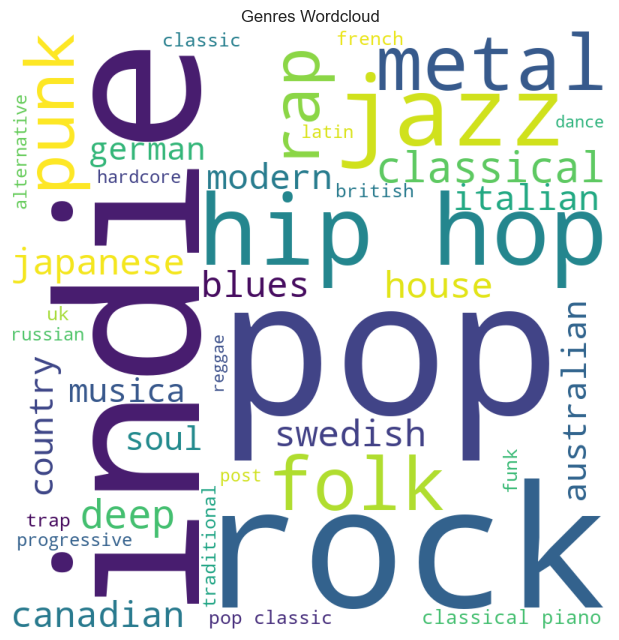

In [41]:
stopwords = set(STOPWORDS)
comment_words = " ".join(genre_data['genres'])+" "
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                max_words=40,
                min_font_size = 10).generate(comment_words)
                      
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Genres Wordcloud")
plt.show()

In [ ]:
from collections import defaultdict
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
import difflib

number_cols = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo']


def get_song_data(song, spotify_data):
    
    try:
        song_data = spotify_data[(spotify_data['name'] == song['name']) 
                                & (spotify_data['year'] == song['year'])].iloc[0]
        return song_data
    
    except IndexError:
        return find_song(song['name'], song['year'])
        

def get_mean_vector(song_list, spotify_data):
    
    song_vectors = []
    
    for song in song_list:
        song_data = get_song_data(song, spotify_data)
        if song_data is None:
            print('Warning: {} does not exist in Spotify or in database'.format(song['name']))
            continue
        song_vector = song_data[number_cols].values
        song_vectors.append(song_vector)  
    
    song_matrix = np.array(list(song_vectors))
    return np.mean(song_matrix, axis=0)


def flatten_dict_list(dict_list):
    
    flattened_dict = defaultdict()
    for key in dict_list[0].keys():
        flattened_dict[key] = []
    
    for dictionary in dict_list:
        for key, value in dictionary.items():
            flattened_dict[key].append(value)
            
    return flattened_dict


def recommend_songs( song_list, spotify_data, n_songs=10):
    
    metadata_cols = ['name', 'year', 'artists']
    song_dict = flatten_dict_list(song_list)
    
    song_center = get_mean_vector(song_list, spotify_data)
    scaler = song_cluster_pipeline.steps[0][1]
    scaled_data = scaler.transform(spotify_data[number_cols])
    scaled_song_center = scaler.transform(song_center.reshape(1, -1))
    distances = cdist(scaled_song_center, scaled_data, 'cosine')
    index = list(np.argsort(distances)[:, :n_songs][0])
    
    rec_songs = spotify_data.iloc[index]
    rec_songs = rec_songs[~rec_songs['name'].isin(song_dict['name'])]
    return rec_songs[metadata_cols].to_dict(orient='records')

In [12]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [15]:
credmanager = SpotifyClientCredentials(client_id='6c235f1045cf45c08208ee92dd45c146', client_secret='6c54872c4cde4e24aa8241af7b142163')
sp = spotipy.Spotify(client_credentials_manager=credmanager)

In [16]:
artist_search = sp.search('Eminem', type='artist')['artists']['items'][0]
artist_search

{'external_urls': {'spotify': 'https://open.spotify.com/artist/7dGJo4pcD2V6oG8kP0tJRR'},
 'followers': {'href': None, 'total': 81233200},
 'genres': ['detroit hip hop', 'hip hop', 'rap'],
 'href': 'https://api.spotify.com/v1/artists/7dGJo4pcD2V6oG8kP0tJRR',
 'id': '7dGJo4pcD2V6oG8kP0tJRR',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/ab6761610000e5eba00b11c129b27a88fc72f36b',
   'width': 640},
  {'height': 320,
   'url': 'https://i.scdn.co/image/ab67616100005174a00b11c129b27a88fc72f36b',
   'width': 320},
  {'height': 160,
   'url': 'https://i.scdn.co/image/ab6761610000f178a00b11c129b27a88fc72f36b',
   'width': 160}],
 'name': 'Eminem',
 'popularity': 90,
 'type': 'artist',
 'uri': 'spotify:artist:7dGJo4pcD2V6oG8kP0tJRR'}

In [18]:
def art_features(spotify_search_result):
    """function to retrieve info about the artists"""
    result = {
        'artist_name': spotify_search_result.get('name', 'artist_name_not_available'),
        'artist_id': spotify_search_result.get('id', 'artist_id_not_available'),
        'artist_popularity': spotify_search_result.get('popularity', 0),
        'artist_first_genre': (spotify_search_result.get('genres', ['genre_not_available']) + ['genre_not_available'])[0],
        'artist_n_followers': spotify_search_result.get('followers', {}).get('total', 0)
    }
    return result

artist_features = art_features(artist_search)
artist_features

{'artist_name': 'Eminem',
 'artist_id': '7dGJo4pcD2V6oG8kP0tJRR',
 'artist_popularity': 90,
 'artist_first_genre': 'detroit hip hop',
 'artist_n_followers': 81233200}

In [19]:
artist_related_artists = sp.artist_related_artists(artist_features['artist_id'])['artists']

print('Artist has', len(artist_related_artists), 'related artists. The first one is given below. \n\n')

art_features(artist_related_artists[0])

Artist has 20 related artists. The first one is given below. 




{'artist_name': 'Dr. Dre',
 'artist_id': '6DPYiyq5kWVQS4RGwxzPC7',
 'artist_popularity': 79,
 'artist_first_genre': 'g funk',
 'artist_n_followers': 11200521}

In [20]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [21]:
G = nx.Graph() # create an empty graph

popularity_threshold = 80 # if an artist have a lower popularity, it won't be in our graph.

artists_name_list = ['Taylor Swift', 'Adele', 'Beyonce', 'Michael Jackson', 'Michael Buble', 'Ed Sheeran', 'Norah Jones', 
                     'Beatles', 'Ella Fitzgerald', 'Elton John', 'Shakira', 'Lady Gaga', 'Ariana Grande', 'Stevie Wonder', 
                     'Billie Eilish', 'Dua Lipa', 'Mariah Carey', 'Jennifer Lopez', 'Eminem', 'Imagine Dragons', 'Adam Levine', 
                     'Camila Cabello', 'Shawn Mendes', 'The Weekend', 'Olivia Rodrigo', 'Ramin Djawadi', 'Avicii', 'Snoop Dogg', 
                      'Drake', 'Kanye West', 'Kendrick Lamar', 'Linkin Park', 'Led Zepplin', 'Madonna', 'Lil Nas X', 'BTS']

print('There are', len(artists_name_list), 'artists in the initial list.')


for name in artists_name_list:
    search = sp.search(name, type='artist')['artists']['items'][0]
    this_artist = art_features(search)
    
    if this_artist['artist_popularity'] >= popularity_threshold:
        G.add_node(this_artist['artist_name'], **this_artist, related_found=False)
    else:
        print(name, 'is not a popular artist, we do not add it to our graph.')

There are 36 artists in the initial list.
Michael Buble is not a popular artist, we do not add it to our graph.
Norah Jones is not a popular artist, we do not add it to our graph.
Ella Fitzgerald is not a popular artist, we do not add it to our graph.
Stevie Wonder is not a popular artist, we do not add it to our graph.
Mariah Carey is not a popular artist, we do not add it to our graph.
Jennifer Lopez is not a popular artist, we do not add it to our graph.
Adam Levine is not a popular artist, we do not add it to our graph.
Camila Cabello is not a popular artist, we do not add it to our graph.
Ramin Djawadi is not a popular artist, we do not add it to our graph.
Led Zepplin is not a popular artist, we do not add it to our graph.
Lil Nas X is not a popular artist, we do not add it to our graph.


In [27]:
dummy = 0

while dummy == 0:
    l = len(G) # number of nodes in the graph currently
    
    for x in list(G): # iterate each node
        if G.nodes[x]['related_found'] == False: # then we need to find its related artists
            relateds = sp.artist_related_artists(G.nodes[x]['artist_id'])['artists']
            relateds = [art_features(r) for r in relateds]
            relateds_names = [r['artist_name'] for r in relateds]
            G.nodes[x]['related_found'] = True # it was False, but now we found its related artists
            
            for rname, rdict in zip(relateds_names, relateds):
                if rdict['artist_popularity'] >= popularity_threshold:
                    
                    if rname in G: # node already in G
                        pass # do nothing
                    
                    else:
                        G.add_node(rname, **rdict, related_found=False) # we added a new node, we don't know its relateds yet
                        clear_output(wait=True)
                        print('The graph has', len(G), 'nodes now.')
                        
                    G.add_edge(x, rname) # we add an edge between x and its related rname
                    
    if len(G) == l or len(G) > 50: # number of nodes didn't change or graph grew too large
        dummy = 1 # break the while loop
        print('Done.')

Done.


In [28]:
# connected components
n_connected = nx.number_connected_components(G)
print('The graph has', n_connected, 'connected components.')

The graph has 3 connected components.


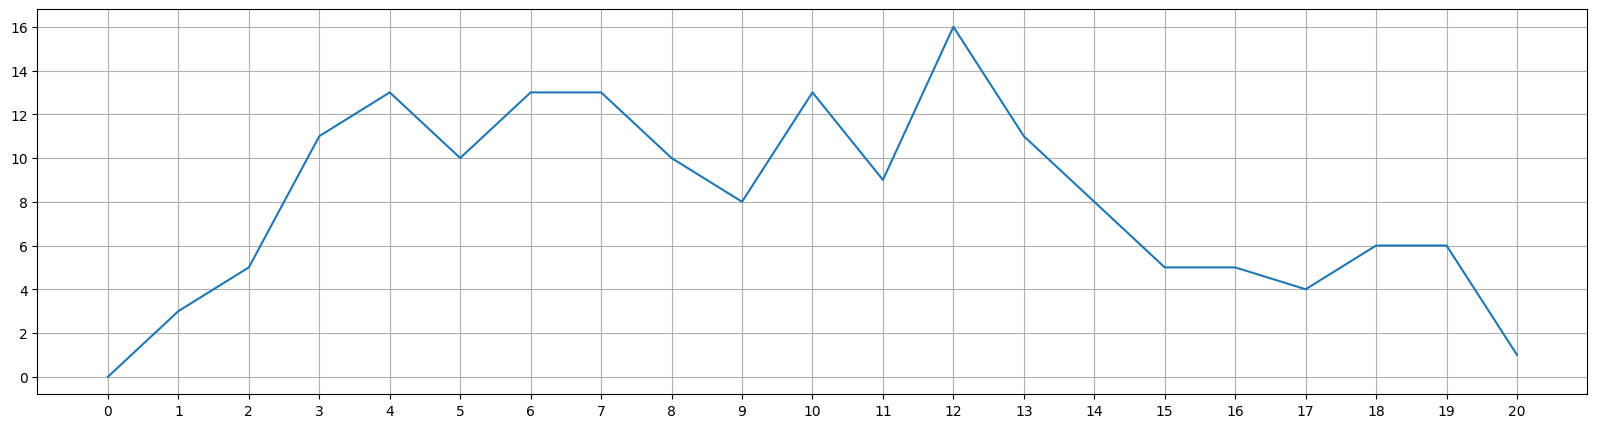

In [29]:
plt.figure(figsize=(20,5))
degree_hist = nx.degree_histogram(G)
plt.plot(degree_hist)
plt.xticks(np.arange(0,len(degree_hist)))
plt.yticks(np.arange(0,max(degree_hist)+1,2))
plt.grid()
plt.show()

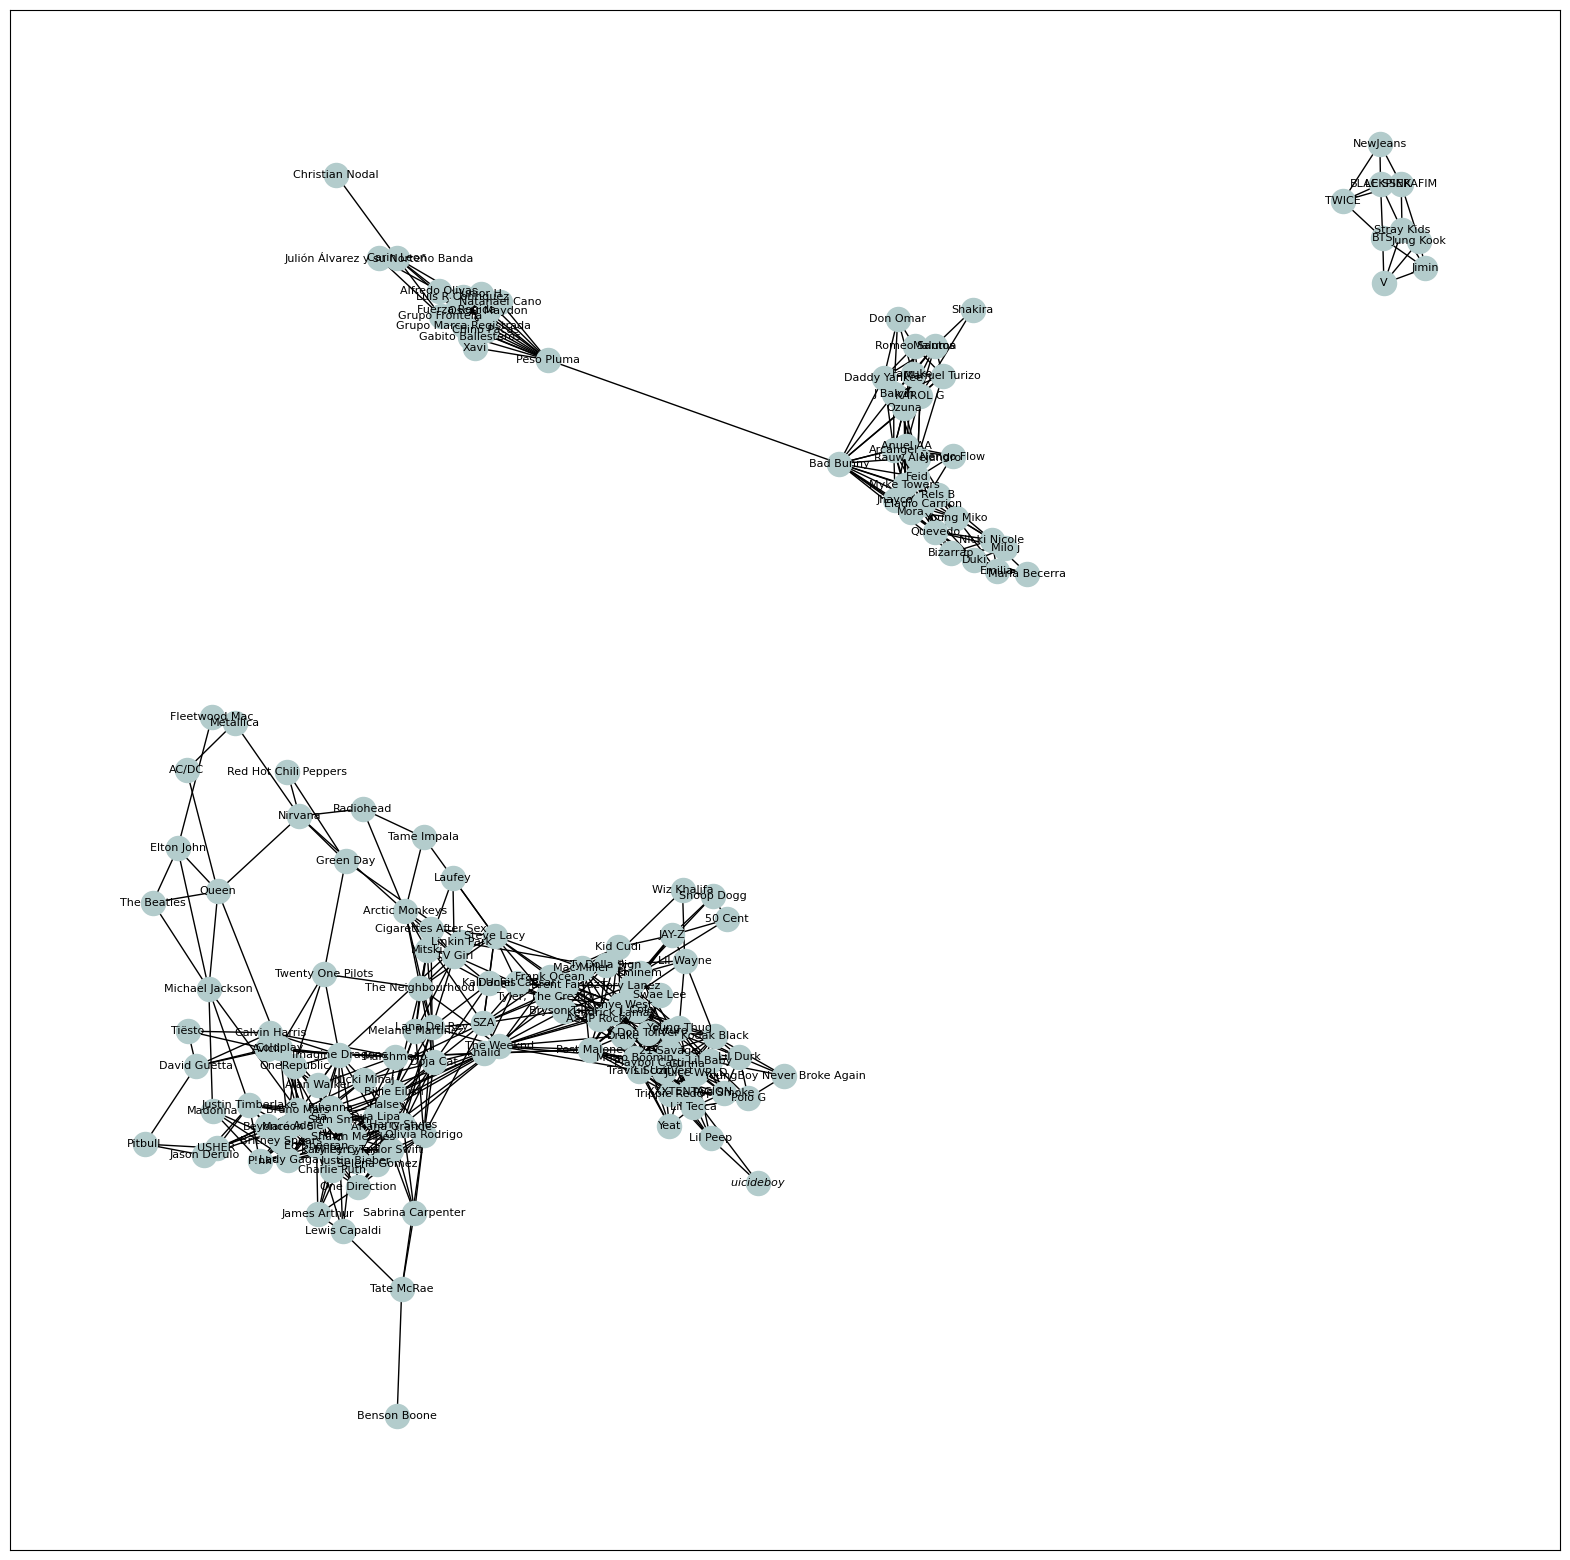

In [30]:
np.random.seed(0)
plt.figure(figsize=(20,20))
nx.draw_networkx(G, with_labels=True, node_color=(.7,.8,.8), font_size=8)

In [31]:
"""
Label propagation community detection algorithms.
"""
from collections import Counter, defaultdict

import networkx as nx
from networkx.utils import groups
from networkx.utils import not_implemented_for
from networkx.utils import py_random_state

__all__ = ["label_propagation_communities", "asyn_lpa_communities"]


@py_random_state(2)
def asyn_lpa_communities(G, weight=None, seed=None):
    """Returns communities in `G` as detected by asynchronous label
    propagation.

    The asynchronous label propagation algorithm is described in
    [1]_. The algorithm is probabilistic and the found communities may
    vary on different executions.

    The algorithm proceeds as follows. After initializing each node with
    a unique label, the algorithm repeatedly sets the label of a node to
    be the label that appears most frequently among that nodes
    neighbors. The algorithm halts when each node has the label that
    appears most frequently among its neighbors. The algorithm is
    asynchronous because each node is updated without waiting for
    updates on the remaining nodes.

    This generalized version of the algorithm in [1]_ accepts edge
    weights.

    Parameters
    ----------
    G : Graph

    weight : string
        The edge attribute representing the weight of an edge.
        If None, each edge is assumed to have weight one. In this
        algorithm, the weight of an edge is used in determining the
        frequency with which a label appears among the neighbors of a
        node: a higher weight means the label appears more often.

    seed : integer, random_state, or None (default)
        Indicator of random number generation state.
        See :ref:`Randomness<randomness>`.

    Returns
    -------
    communities : iterable
        Iterable of communities given as sets of nodes.

    Notes
    -----
    Edge weight attributes must be numerical.

    References
    ----------
    .. [1] Raghavan, Usha Nandini, Réka Albert, and Soundar Kumara. "Near
           linear time algorithm to detect community structures in large-scale
           networks." Physical Review E 76.3 (2007): 036106.
    """

    labels = {n: i for i, n in enumerate(G)}
    cont = True

    while cont:
        cont = False
        nodes = list(G)
        seed.shuffle(nodes)

        for node in nodes:

            if not G[node]:
                continue

            # Get label frequencies among adjacent nodes.
            # Depending on the order they are processed in,
            # some nodes will be in iteration t and others in t-1,
            # making the algorithm asynchronous.
            if weight is None:
                # initialising a Counter from an iterator of labels is
                # faster for getting unweighted label frequencies
                label_freq = Counter(map(labels.get, G[node]))
            else:
                # updating a defaultdict is substantially faster
                # for getting weighted label frequencies
                label_freq = defaultdict(float)
                for _, v, wt in G.edges(node, data=weight, default=1):
                    label_freq[labels[v]] += wt

            # Get the labels that appear with maximum frequency.
            max_freq = max(label_freq.values())
            best_labels = [
                label for label, freq in label_freq.items() if freq == max_freq
            ]

            # If the node does not have one of the maximum frequency labels,
            # randomly choose one of them and update the node's label.
            # Continue the iteration as long as at least one node
            # doesn't have a maximum frequency label.
            if labels[node] not in best_labels:
                labels[node] = seed.choice(best_labels)
                cont = True

    yield from groups(labels).values()



@not_implemented_for("directed")
def label_propagation_communities(G):
    """Generates community sets determined by label propagation

    Finds communities in `G` using a semi-synchronous label propagation
    method[1]_. This method combines the advantages of both the synchronous
    and asynchronous models. Not implemented for directed graphs.

    Parameters
    ----------
    G : graph
        An undirected NetworkX graph.

    Returns
    -------
    communities : iterable
        A dict_values object that contains a set of nodes for each community.

    Raises
    ------
    NetworkXNotImplemented
       If the graph is directed

    References
    ----------
    .. [1] Cordasco, G., & Gargano, L. (2010, December). Community detection
       via semi-synchronous label propagation algorithms. In Business
       Applications of Social Network Analysis (BASNA), 2010 IEEE International
       Workshop on (pp. 1-8). IEEE.
    """
    coloring = _color_network(G)
    # Create a unique label for each node in the graph
    labeling = {v: k for k, v in enumerate(G)}
    while not _labeling_complete(labeling, G):
        # Update the labels of every node with the same color.
        for color, nodes in coloring.items():
            for n in nodes:
                _update_label(n, labeling, G)

    clusters = defaultdict(set)
    for node, label in labeling.items():
        clusters[label].add(node)
    return clusters.values()



def _color_network(G):
    """Colors the network so that neighboring nodes all have distinct colors.

    Returns a dict keyed by color to a set of nodes with that color.
    """
    coloring = dict()  # color => set(node)
    colors = nx.coloring.greedy_color(G)
    for node, color in colors.items():
        if color in coloring:
            coloring[color].add(node)
        else:
            coloring[color] = {node}
    return coloring


def _labeling_complete(labeling, G):
    """Determines whether or not LPA is done.

    Label propagation is complete when all nodes have a label that is
    in the set of highest frequency labels amongst its neighbors.

    Nodes with no neighbors are considered complete.
    """
    return all(
        labeling[v] in _most_frequent_labels(v, labeling, G) for v in G if len(G[v]) > 0
    )


def _most_frequent_labels(node, labeling, G):
    """Returns a set of all labels with maximum frequency in `labeling`.

    Input `labeling` should be a dict keyed by node to labels.
    """
    if not G[node]:
        # Nodes with no neighbors are themselves a community and are labeled
        # accordingly, hence the immediate if statement.
        return {labeling[node]}

    # Compute the frequencies of all neighbours of node
    freqs = Counter(labeling[q] for q in G[node])
    max_freq = max(freqs.values())
    return {label for label, freq in freqs.items() if freq == max_freq}


def _update_label(node, labeling, G):
    """Updates the label of a node using the Prec-Max tie breaking algorithm

    The algorithm is explained in: 'Community Detection via Semi-Synchronous
    Label Propagation Algorithms' Cordasco and Gargano, 2011
    """
    high_labels = _most_frequent_labels(node, labeling, G)
    if len(high_labels) == 1:
        labeling[node] = high_labels.pop()
    elif len(high_labels) > 1:
        # Prec-Max
        if labeling[node] not in high_labels:
            labeling[node] = max(high_labels)

In [32]:
list(label_propagation_communities(G))


[{'Adele',
  'Alan Walker',
  'Ariana Grande',
  'Avicii',
  'Benson Boone',
  'Beyoncé',
  'Billie Eilish',
  'Britney Spears',
  'Bruno Mars',
  'Calvin Harris',
  'Charlie Puth',
  'Coldplay',
  'David Guetta',
  'Doja Cat',
  'Dua Lipa',
  'Ed Sheeran',
  'Halsey',
  'Harry Styles',
  'Imagine Dragons',
  'James Arthur',
  'Jason Derulo',
  'Justin Bieber',
  'Justin Timberlake',
  'Katy Perry',
  'Lady Gaga',
  'Lewis Capaldi',
  'Madonna',
  'Maroon 5',
  'Marshmello',
  'Miley Cyrus',
  'Nicki Minaj',
  'Olivia Rodrigo',
  'One Direction',
  'OneRepublic',
  'P!nk',
  'Pitbull',
  'Rihanna',
  'Sabrina Carpenter',
  'Sam Smith',
  'Selena Gomez',
  'Shawn Mendes',
  'Sia',
  'Tate McRae',
  'Taylor Swift',
  'Tiësto',
  'Twenty One Pilots',
  'USHER'},
 {'AC/DC',
  'Elton John',
  'Fleetwood Mac',
  'Metallica',
  'Michael Jackson',
  'Nirvana',
  'Queen',
  'The Beatles'},
 {'Daddy Yankee',
  'Don Omar',
  'Farruko',
  'J Balvin',
  'KAROL G',
  'Maluma',
  'Manuel Turizo',
  '

In [34]:
d = _color_network(G)

l = []
for i in range(0, len(d)): 
    l.append(list(d[i]))



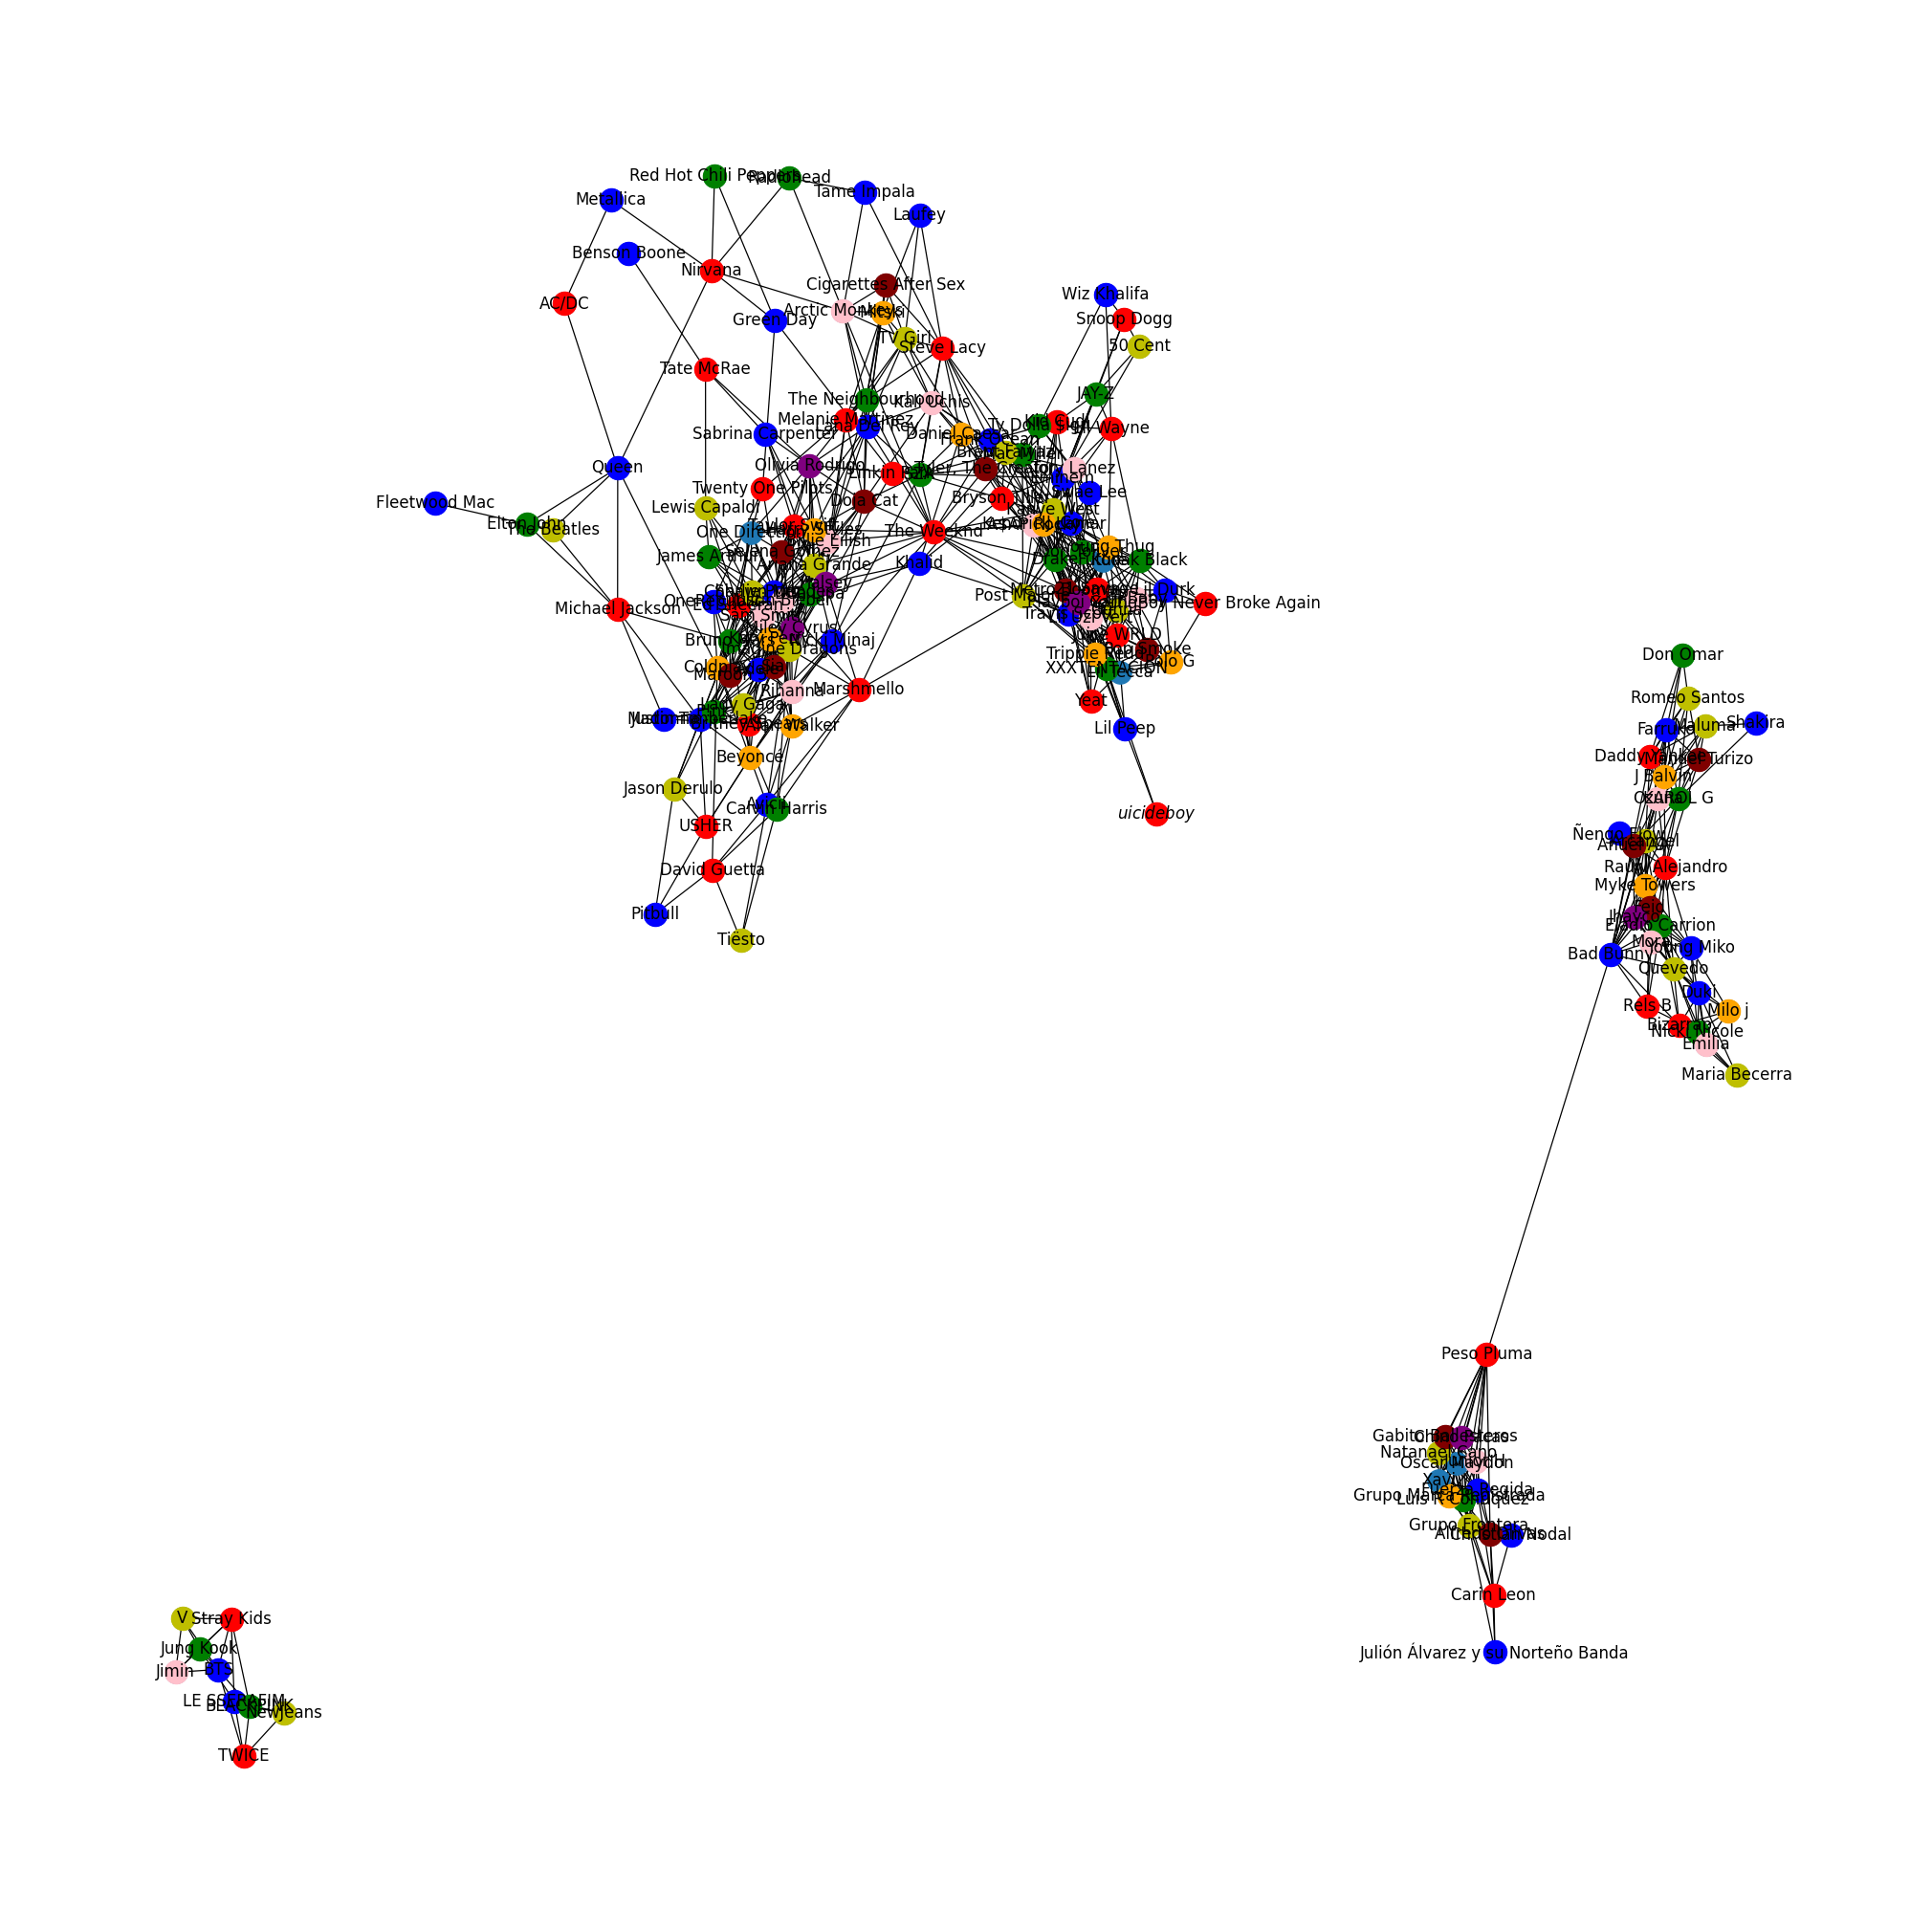

In [35]:
#For each community list, draw the nodes, giving it a specific color.

pos = nx.spring_layout(G) 
plt.figure(figsize=(20,20))
nx.draw(G, pos, edge_color='k',  with_labels=True,
         font_weight='light', node_size= 280, width= 0.9)

nx.draw_networkx_nodes(G, pos, nodelist=l[0], node_color='b')
nx.draw_networkx_nodes(G, pos, nodelist=l[1], node_color='r')
nx.draw_networkx_nodes(G, pos, nodelist=l[2], node_color='g')
nx.draw_networkx_nodes(G, pos, nodelist=l[3], node_color='y')
nx.draw_networkx_nodes(G, pos, nodelist=l[4], node_color='pink')
nx.draw_networkx_nodes(G, pos, nodelist=l[5], node_color='orange')
nx.draw_networkx_nodes(G, pos, nodelist=l[6], node_color='maroon')
nx.draw_networkx_nodes(G, pos, nodelist=l[7], node_color='purple')

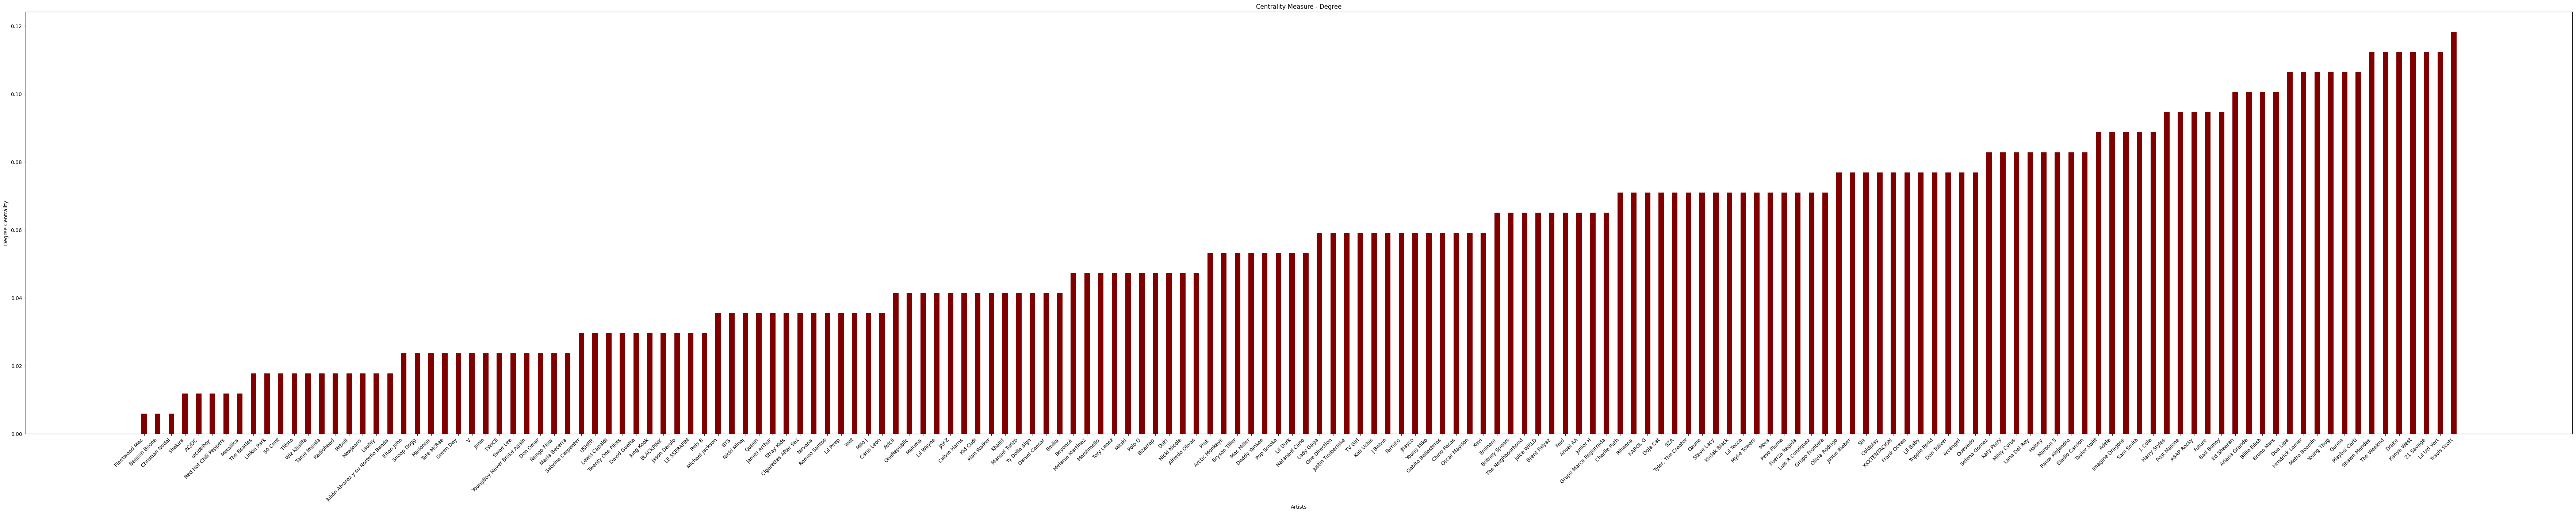

In [36]:
d = nx.degree_centrality(G)
marklist = sorted(d.items(), key=lambda x:x[1])
d = dict(marklist)


artists = list(d.keys())
values = list(d.values())

  
fig = plt.figure(figsize = (90, 15))
 
# creating the bar plot
plt.bar(artists, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Artists")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Degree Centrality")
plt.title("Centrality Measure - Degree")
plt.show()

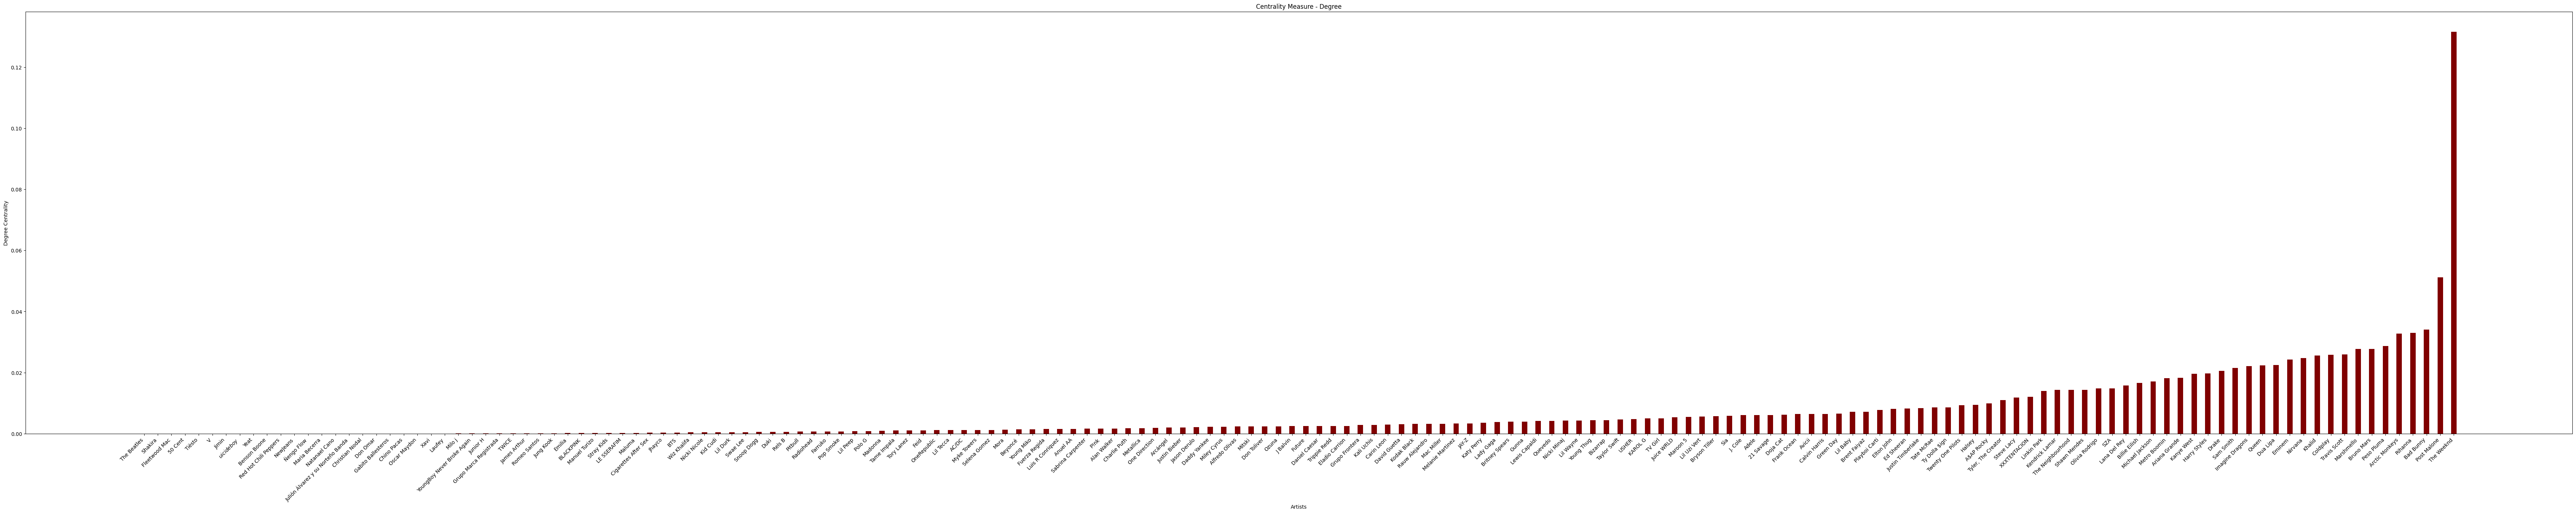

In [38]:
d = nx.betweenness_centrality(G)

marklist = sorted(d.items(), key=lambda x:x[1])
d = dict(marklist)


artists = list(d.keys())
values = list(d.values())

  
fig = plt.figure(figsize = (90, 15))
 
# creating the bar plot
plt.bar(artists, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Artists")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Degree Centrality")
plt.title("Centrality Measure - Degree")
plt.show()

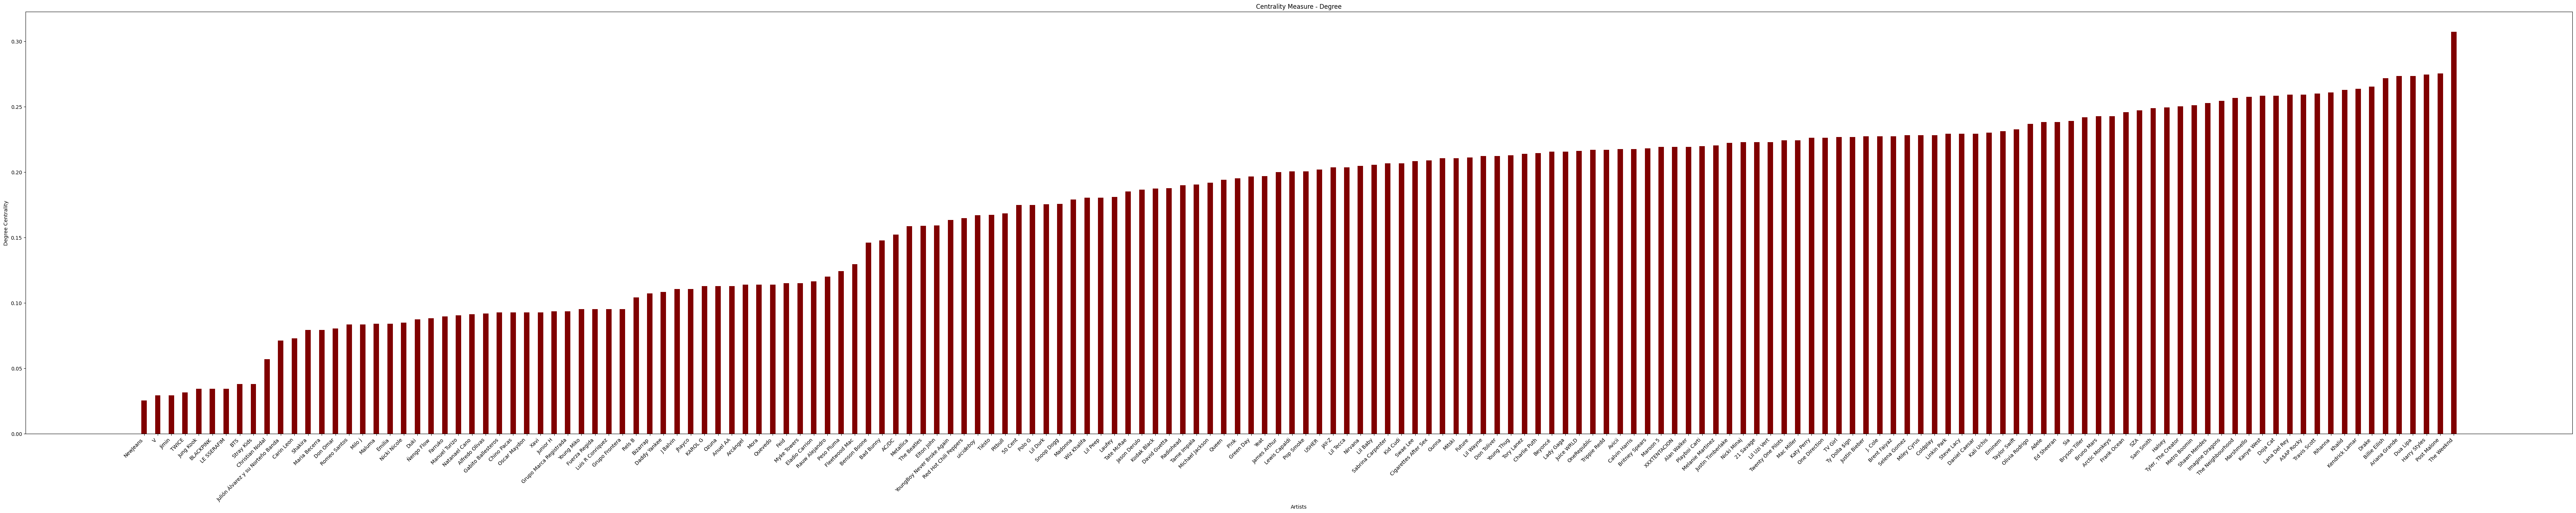

In [39]:
d = nx.closeness_centrality(G)
marklist = sorted(d.items(), key=lambda x:x[1])
d = dict(marklist)


artists = list(d.keys())
values = list(d.values())

  
fig = plt.figure(figsize = (90, 15))
 
# creating the bar plot
plt.bar(artists, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Artists")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Degree Centrality")
plt.title("Centrality Measure - Degree")
plt.show()

In [40]:
b = list(nx.bridges(G))
b


[('Elton John', 'Fleetwood Mac'),
 ('Tate McRae', 'Benson Boone'),
 ('Bad Bunny', 'Peso Pluma'),
 ('Carin Leon', 'Christian Nodal')]

In [41]:
top_clique = set()
cliques = list(nx.find_cliques(G))
for clique in cliques: 
    if (len(clique) > 7):
        for artist in clique:
            top_clique.add(artist)
        
top_clique

{'21 Savage',
 'Anuel AA',
 'Arcángel',
 'Ariana Grande',
 'Bad Bunny',
 'Billie Eilish',
 'Chino Pacas',
 'Don Toliver',
 'Drake',
 'Dua Lipa',
 'Eladio Carrion',
 'Feid',
 'Fuerza Regida',
 'Future',
 'Gabito Ballesteros',
 'Grupo Frontera',
 'Grupo Marca Registrada',
 'Gunna',
 'Halsey',
 'Harry Styles',
 'Jhayco',
 'Junior H',
 'Justin Bieber',
 'Kanye West',
 'Kendrick Lamar',
 'Lil Baby',
 'Lil Tecca',
 'Lil Uzi Vert',
 'Luis R Conriquez',
 'Metro Boomin',
 'Mora',
 'Myke Towers',
 'Natanael Cano',
 'Oscar Maydon',
 'Peso Pluma',
 'Playboi Carti',
 'Quevedo',
 'Rauw Alejandro',
 'Selena Gomez',
 'Shawn Mendes',
 'Taylor Swift',
 'Travis Scott',
 'Trippie Redd',
 'Xavi',
 'Young Miko',
 'Young Thug'}

In [42]:
import networkx as nx
import math
import itertools
import numpy as np



In [43]:
# score based on mutual information
def score_mutual(x , y, prior, likelihood):

    # common neighbors
    CN = nx.common_neighbors(G, x, y)

    # prior (x, y)
    priorXY = - np.log2(prior(x, y, G))

    # sum over neighbors
    cnMI = 0
    for z in CN:
        # degree of z
        kz = G.degree(z)
        coeffZ = 1 / (kz * (kz-1))

        # sum over edges = neighbors of z
        zMI = 0
        for m, n in itertools.combinations(G.neighbors(z), 2):
            priorInfo = - np.log2(prior(m, n, G))
            likelihoodInfo = - np.log2(likelihood(z, G))

            # combine mutual information
            zMI += 2 * (priorInfo - likelihoodInfo)

        # add average mutual information per neighbor
        cnMI += coeffZ * zMI

    return cnMI - priorXY

In [44]:
from operator import mul    # or mul=lambda x,y:x*y
from fractions import Fraction
from functools import reduce

def nCk(n,k): 
  return int( reduce(mul, (Fraction(n-i, i+1) for i in range(k)), 1) )

In [45]:
def prior(m, n, G):
    kn = G.degree(n)
    km = G.degree(m)
    M = G.number_of_edges()
    
    return 1 - nCk(M-kn, km)/nCk(M, km)

In [46]:
def likelihood(z, G):
    kz = G.degree(z)
    N_triangles = nx.triangles(G, z)
    N_triads = nCk(kz, 2)
    
    return N_triangles / N_triads

NetworkXError: v is not in the graph.